In [6]:
%ls

AA320 Lesson Planner_Marymount 101119.docx
Nathan_Jennifer_Marymount_Nb.ipynb
shoes_v2.xlsx


## Importing python libraries which help us speed our coding up.
#The packages we're importing are below.
import pandas as pd
import random
from pandas.plotting import scatter_matrix
import scipy as sc
import numpy as np
import matplotlib
import matplotlib.pyplot as plt #Can abbreviate specific parts of the packages so it's easier to type
import sklearn as sk
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

In [58]:
#Importing python libraries which help us speed our coding up.
#The packages we're importing are below.
import pandas as pd
import random
from pandas.plotting import scatter_matrix
import scipy as sc
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import re
import matplotlib.pyplot as plt #Can abbreviate specific parts of the packages so it's easier to type
import sklearn as sk
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

In [4]:
#We will now read the data in and store it in a dataframe called dataset
dataset = pd.read_excel('shoes_v2.xlsx', header = 0)

#### Understanding our data
Let's run some code and see how many rows and columns we have. Below - you will see the result as (Number of Rows, Number of Columns)

In [5]:
dataset.shape

(373, 12)

#### What do the first 10 rows of our data look like? 

In [6]:
dataset.head(10)

,product_asin,product_name,product_sale_price,product_category,product_brand,product_rating,num_ratings,product_sizes,product_colors,product_features,product_terms,product_qa
0,B07D3G9ZNG,Brooks Women's Levitate 2,$99.80 - $249.95Lower price available on selec...,"Clothing, Shoes & Jewelry,Women,Shoes,Athletic...",NaN,4.4,163,"Select,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,...","Coral/Blue/Black,Aster/Purple/Blue,Pink/Black/...","Fabric,Imported,Rubber sole,The Brooks® Levita...","toe box,second pair,love these shoes,true to s...",22
1,B07VKQWZR4,Nike Women's Viale Running Shoe,$33.39 - $133.00,"Clothing, Shoes & Jewelry,Women,Shoes,Athletic...",NaN,4.0,109,"Select,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,1...","Light Cream/Pure Platinum - White,Wolf Grey/Wh...","100% Leather and Synthetic,Imported,Rubber sol...",NaN,13
2,B07X92DWVM,adidas Originals Women's Superstar Sneaker,$38.55 - $169.76,"Clothing, Shoes & Jewelry,Women,Shoes,Fashion ...",NaN,4.5,392,"Select,1,1.5,2,2.5,3,5,5.5,6,6.5,7,7.5,8,8.5,9...","Scarlet/Scarlet/White,White/Ash Green/Silver M...","100% full grain leather,Imported,N/A,Rubber so...",NaN,81
3,B077GB5R7R,"ECCO Women?s, Biom Fjuel Blaze Lace up Sneaker",$69.68 - $159.06Lower price available on selec...,"Clothing, Shoes & Jewelry,Women,Shoes,Athletic...",NaN,4.1,26,"Select,4-4.5,5-5.5,7-7.5,8-8.5,9-9.5,10-10.5,1...","Black/Black,Concrete/White,Dark Shadow/Dark Sh...","Synthetic,Imported,Rubber sole,The flexible Bi...",NaN,5
4,B01KLTBMLA,adidas Women's W Tech Response Golf Shoe,$29.99 - $140.34Lower price available on selec...,"Clothing, Shoes & Jewelry,Women,Shoes,Athletic...",adidas,4.4,222,"Select,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11,9.5...","Black/Silver Metallic/Grey Five,Clear/Grey,Whi...","Microfiber Leather/Climastorm,Imported,Synthet...",NaN,21
5,B07GSVDPST,CLARKS Women's Leisa Sadie Clog,$36.14 - $109.99Lower price available on selec...,"Clothing, Shoes & Jewelry,Women,Shoes,Mules & ...",NaN,4.4,481,"Select,5,5.5,6,6 Wide,6.5,6.5 Wide,7,7 Wide,7....","Black Leather,Dark Tan Leather,Navy Leather,Da...","100% Leather,Imported,Rubber sole,Heel measure...",NaN,13
6,B072F85JCB,Nike Women's Flex Experience RN 7 Black/Black ...,$59.94,"Clothing, Shoes & Jewelry,Women,Shoes,Athletic...",NaN,4.0,1,NaN,NaN,"Fabric-And-Synthetic,Rubber sole,Platform meas...",NaN,0
7,B00FLO35HU,Clarks Women's Ashland Bubble Slip-On,$28.22 - $89.97Lower price available on select...,"Clothing, Shoes & Jewelry,Women,Shoes,Loafers ...",NaN,4.5,"1,309","Select,5,5.5,6,6 Wide,6 X-Wide,6.5,6.5 Wide,6....","Black,Brown Multi,Tan Leather,Black Interest,M...","100% Leather,Imported,Synthetic sole,Heel meas...","clark shoes,well made,toe box,right out of the...",70
8,B07SD1MSBB,SKOEX Women Rhinestone Ballroom Dance Shoes La...,$19.99 - $39.99,"Clothing, Shoes & Jewelry,Women,Shoes,Athletic...",SKOEX,4.4,14,"Select,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5","Black-2.5inch Heel,Black-3inch Heel,Tan-3inch ...","Satin upper,Soft suede sole,Elegant Exterior: ...",NaN,0
9,B07V69KHHZ,Under Armour Women's Charged Rogue Running Shoe,$39.97 - $80.00Lower price available on select...,"Clothing, Shoes & Jewelry,Women,Shoes,Athletic...",NaN,4.6,40,"Select,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,1...","Black (002)/White,Blue Heights (400)/Breathtak...","100% Textile,Imported,Synthetic sole,Shaft mea...",NaN,10


In [11]:
# checking the percentage of missing values in each variable
x = dataset.isnull().sum()/len(dataset)*100
x

product_asin           0.000000
product_name           0.000000
product_sale_price     0.000000
product_category       0.000000
product_brand         63.806971
product_rating         0.000000
num_ratings            0.000000
product_sizes          1.340483
product_colors         4.021448
product_features       0.536193
product_terms         65.415550
product_qa             0.000000
dtype: float64

In [7]:
dataset.product_category = dataset.product_category.replace({'Clothing, Shoes & Jewelry,':''}, regex=True)

In [8]:
dataset['num_colors'] = ''

In [9]:
dataset["num_colors"] = dataset.product_colors.str.count(',') + 1

In [10]:
dataset['num_colors'].value_counts()

2.0      56
4.0      55
3.0      35
5.0      27
6.0      22
1.0      20
16.0     17
10.0     14
7.0      14
9.0      13
8.0      12
15.0      9
12.0      9
11.0      7
13.0      6
14.0      4
18.0      4
24.0      3
34.0      3
36.0      3
22.0      3
85.0      2
19.0      2
33.0      2
31.0      2
27.0      2
17.0      2
26.0      1
20.0      1
44.0      1
39.0      1
23.0      1
21.0      1
49.0      1
264.0     1
37.0      1
28.0      1
Name: num_colors, dtype: int64

In [11]:
dataset.head()

,product_asin,product_name,product_sale_price,product_category,product_brand,product_rating,num_ratings,product_sizes,product_colors,product_features,product_terms,product_qa,num_colors
0,B07D3G9ZNG,Brooks Women's Levitate 2,$99.80 - $249.95Lower price available on selec...,"Women,Shoes,Athletic,Running,Road Running",NaN,4.4,163,"Select,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,...","Coral/Blue/Black,Aster/Purple/Blue,Pink/Black/...","Fabric,Imported,Rubber sole,The Brooks® Levita...","toe box,second pair,love these shoes,true to s...",22,11.0
1,B07VKQWZR4,Nike Women's Viale Running Shoe,$33.39 - $133.00,"Women,Shoes,Athletic,Running,Road Running",NaN,4.0,109,"Select,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,1...","Light Cream/Pure Platinum - White,Wolf Grey/Wh...","100% Leather and Synthetic,Imported,Rubber sol...",NaN,13,13.0
2,B07X92DWVM,adidas Originals Women's Superstar Sneaker,$38.55 - $169.76,"Women,Shoes,Fashion Sneakers",NaN,4.5,392,"Select,1,1.5,2,2.5,3,5,5.5,6,6.5,7,7.5,8,8.5,9...","Scarlet/Scarlet/White,White/Ash Green/Silver M...","100% full grain leather,Imported,N/A,Rubber so...",NaN,81,15.0
3,B077GB5R7R,"ECCO Women?s, Biom Fjuel Blaze Lace up Sneaker",$69.68 - $159.06Lower price available on selec...,"Women,Shoes,Athletic,Walking",NaN,4.1,26,"Select,4-4.5,5-5.5,7-7.5,8-8.5,9-9.5,10-10.5,1...","Black/Black,Concrete/White,Dark Shadow/Dark Sh...","Synthetic,Imported,Rubber sole,The flexible Bi...",NaN,5,3.0
4,B01KLTBMLA,adidas Women's W Tech Response Golf Shoe,$29.99 - $140.34Lower price available on selec...,"Women,Shoes,Athletic,Golf",adidas,4.4,222,"Select,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11,9.5...","Black/Silver Metallic/Grey Five,Clear/Grey,Whi...","Microfiber Leather/Climastorm,Imported,Synthet...",NaN,21,7.0


In [12]:
dataset["show_low_price"] = '' 

In [13]:
dataset["show_low_price"] = dataset['product_sale_price'].str.split(' ').str[0]

In [14]:
dataset["show_low_price"] = [x[1:] for x in dataset["show_low_price"]]

In [15]:
dataset["show_low_price"] = pd.to_numeric(dataset["show_low_price"])

In [16]:
dataset["show_low_price"].value_counts()

23.83     9
21.99     9
29.99     8
29.95     8
19.99     7
39.95     7
7.99      6
24.99     6
17.99     6
34.99     5
30.00     4
32.99     4
39.99     4
20.00     3
37.50     3
31.99     3
26.99     3
25.00     3
30.99     3
34.95     3
14.00     2
27.97     2
28.99     2
19.23     2
35.73     2
5.99      2
47.26     2
33.99     2
19.01     2
27.99     2
         ..
19.79     1
76.16     1
40.76     1
19.40     1
29.61     1
37.30     1
43.41     1
22.15     1
22.59     1
23.90     1
41.95     1
38.95     1
38.55     1
43.99     1
29.89     1
23.48     1
27.30     1
41.31     1
21.03     1
39.97     1
34.98     1
16.02     1
16.60     1
72.98     1
63.18     1
34.82     1
15.57     1
29.16     1
89.99     1
112.16    1
Name: show_low_price, Length: 265, dtype: int64

In [17]:
dataset["show_high_price"] = '' 

In [18]:
dataset["show_high_price"] = dataset['product_sale_price'].str.split(' ').str[2]

In [19]:
dataset["show_high_price"] = dataset['show_high_price'].fillna("0.00")

In [20]:
dataset["show_high_price"] = dataset["show_high_price"].apply(lambda x: x.strip('$'))

In [21]:
dataset["show_high_price"].replace(r'[a-zA-Z%]', '', regex=True, inplace=True)

In [22]:
dataset["show_high_price"] = pd.to_numeric(dataset["show_high_price"])

In [23]:
dataset["show_high_price"].value_counts()

59.99     10
24.99      9
90.00      7
39.99      7
0.00       6
10.99      6
32.99      6
85.00      5
109.00     5
70.00      5
65.00      5
109.99     4
110.93     4
99.95      4
140.34     4
125.63     4
79.95      4
120.00     3
81.51      3
89.97      3
80.00      3
130.91     3
118.29     3
100.00     3
84.00      3
89.95      3
104.44     3
59.95      3
69.99      3
64.95      3
          ..
61.89      1
396.20     1
159.06     1
162.40     1
75.41      1
146.24     1
273.24     1
116.62     1
23.88      1
54.99      1
132.99     1
44.95      1
9.99       1
233.87     1
220.09     1
99.99      1
67.99      1
199.98     1
108.87     1
131.51     1
259.99     1
110.87     1
145.99     1
125.65     1
87.99      1
21.99      1
258.14     1
116.97     1
169.95     1
102.28     1
Name: show_high_price, Length: 230, dtype: int64

In [24]:
dataset["shoe_gender"] = dataset.product_category

In [25]:
dataset['shoe_gender'] = dataset['shoe_gender'].str.split(',').str[0]

In [26]:
dataset['shoe_gender'].value_counts()

Women                366
Men                    5
Girls                  1
Sports & Outdoors      1
Name: shoe_gender, dtype: int64

In [27]:
dataset["shoe_category_fixed"] = ""

In [28]:
dataset["shoe_category_fixed"] = dataset['product_category'].str.split(',').str[1:]

In [30]:
dataset['shoe_category_fixed'].value_counts()


[Shoes, Fashion Sneakers]                                        63
[Shoes]                                                          56
[Shoes, Athletic, Ballet & Dance]                                43
[Shoes, Athletic, Running, Road Running]                         35
[Shoes, Flats]                                                   32
[Shoes, Pumps]                                                   31
[Shoes, Loafers & Slip-Ons]                                      30
[Shoes, Athletic, Walking]                                       28
[Shoes, Mules & Clogs]                                            7
[Shoes, Oxfords]                                                  5
[Shoes, Athletic, Fitness & Cross-Training]                       5
[Shoes, Athletic, Golf]                                           5
[Uniforms,  Work & Safety, Shoes, Health Care & Food Service]     4
[Shoes, Sandals, Platforms & Wedges]                              3
[Shoes, Slippers]                               

In [31]:
dataset["shoe_category_final"] = ""

In [32]:
dataset["shoe_category_final"] = dataset['product_category'].str.split(',').str[-1]

In [33]:
dataset['shoe_category_final'].value_counts()


Fashion Sneakers              63
Shoes                         57
Ballet & Dance                43
Road Running                  35
Flats                         32
Pumps                         31
Loafers & Slip-Ons            30
Walking                       28
Mules & Clogs                  7
Oxfords                        5
Fitness & Cross-Training       5
Golf                           5
Health Care & Food Service     4
Slippers                       3
Platforms & Wedges             3
Heeled Sandals                 2
Industrial & Construction      2
Running                        2
Ankle & Bootie                 2
Skateboarding                  1
Slides                         1
Sneakers                       1
Flip-Flops                     1
Sandals                        1
Water Shoes                    1
Soccer                         1
Volleyball                     1
Boots                          1
Hiking Shoes                   1
Rain Footwear                  1
Tennis & R

In [34]:
dataset.head()

,product_asin,product_name,product_sale_price,product_category,product_brand,product_rating,num_ratings,product_sizes,product_colors,product_features,product_terms,product_qa,num_colors,show_low_price,show_high_price,shoe_gender,shoe_category_fixed,shoe_category_final
0,B07D3G9ZNG,Brooks Women's Levitate 2,$99.80 - $249.95Lower price available on selec...,"Women,Shoes,Athletic,Running,Road Running",NaN,4.4,163,"Select,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,...","Coral/Blue/Black,Aster/Purple/Blue,Pink/Black/...","Fabric,Imported,Rubber sole,The Brooks® Levita...","toe box,second pair,love these shoes,true to s...",22,11.0,99.80,249.95,Women,"[Shoes, Athletic, Running, Road Running]",Road Running
1,B07VKQWZR4,Nike Women's Viale Running Shoe,$33.39 - $133.00,"Women,Shoes,Athletic,Running,Road Running",NaN,4.0,109,"Select,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,1...","Light Cream/Pure Platinum - White,Wolf Grey/Wh...","100% Leather and Synthetic,Imported,Rubber sol...",NaN,13,13.0,33.39,133.00,Women,"[Shoes, Athletic, Running, Road Running]",Road Running
2,B07X92DWVM,adidas Originals Women's Superstar Sneaker,$38.55 - $169.76,"Women,Shoes,Fashion Sneakers",NaN,4.5,392,"Select,1,1.5,2,2.5,3,5,5.5,6,6.5,7,7.5,8,8.5,9...","Scarlet/Scarlet/White,White/Ash Green/Silver M...","100% full grain leather,Imported,N/A,Rubber so...",NaN,81,15.0,38.55,169.76,Women,"[Shoes, Fashion Sneakers]",Fashion Sneakers
3,B077GB5R7R,"ECCO Women?s, Biom Fjuel Blaze Lace up Sneaker",$69.68 - $159.06Lower price available on selec...,"Women,Shoes,Athletic,Walking",NaN,4.1,26,"Select,4-4.5,5-5.5,7-7.5,8-8.5,9-9.5,10-10.5,1...","Black/Black,Concrete/White,Dark Shadow/Dark Sh...","Synthetic,Imported,Rubber sole,The flexible Bi...",NaN,5,3.0,69.68,159.06,Women,"[Shoes, Athletic, Walking]",Walking
4,B01KLTBMLA,adidas Women's W Tech Response Golf Shoe,$29.99 - $140.34Lower price available on selec...,"Women,Shoes,Athletic,Golf",adidas,4.4,222,"Select,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11,9.5...","Black/Silver Metallic/Grey Five,Clear/Grey,Whi...","Microfiber Leather/Climastorm,Imported,Synthet...",NaN,21,7.0,29.99,140.34,Women,"[Shoes, Athletic, Golf]",Golf


In [35]:
dataset.product_sizes = dataset.product_sizes.replace({'Select,':''}, regex=True)

In [36]:
dataset.product_sizes

0         5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12
1       5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12
2      1,1.5,2,2.5,3,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10...
3      4-4.5,5-5.5,7-7.5,8-8.5,9-9.5,10-10.5,11-11.5,...
4           5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11,9.5 M US
5      5,5.5,6,6 Wide,6.5,6.5 Wide,7,7 Wide,7.5,7.5 W...
6                                                    NaN
7      5,5.5,6,6 Wide,6 X-Wide,6.5,6.5 Wide,6.5 X-Wid...
8                    5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5
9            5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,12
10     5,5 Wide,5.5,5.5 Wide,6,6 Wide,6.5,6.5 Wide,7,...
11     6 Women/4 Men,7 Women/5 Men,8 Women/6 Men,9 Wo...
12     5,5.5,6,6 Wide,6.5,6.5 Wide,7,7 Narrow,7 Wide,...
13      5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12
14     4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11...
15     5,5 Wide,5 X-Wide,5.5,5.5 Wide,5.5 X-Wide,6,6 ...
16                   5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11
17                           5.

In [37]:
dataset["num_sizes"] = ""

In [38]:
dataset["num_sizes"] = dataset.product_sizes.str.count(',') + 1

In [39]:
dataset['num_sizes'].value_counts()

12.0    44
13.0    30
14.0    27
11.0    25
10.0    22
24.0    22
15.0    20
9.0     19
22.0    15
25.0    11
20.0    11
23.0     8
33.0     8
28.0     8
5.0      8
19.0     7
43.0     7
30.0     7
31.0     6
27.0     6
32.0     5
26.0     5
4.0      5
8.0      5
16.0     4
29.0     4
37.0     4
18.0     3
51.0     3
39.0     2
21.0     2
17.0     2
34.0     2
58.0     2
45.0     1
75.0     1
7.0      1
49.0     1
42.0     1
55.0     1
47.0     1
6.0      1
54.0     1
Name: num_sizes, dtype: int64

In [40]:
dataset.head()

,product_asin,product_name,product_sale_price,product_category,product_brand,product_rating,num_ratings,product_sizes,product_colors,product_features,product_terms,product_qa,num_colors,show_low_price,show_high_price,shoe_gender,shoe_category_fixed,shoe_category_final,num_sizes
0,B07D3G9ZNG,Brooks Women's Levitate 2,$99.80 - $249.95Lower price available on selec...,"Women,Shoes,Athletic,Running,Road Running",NaN,4.4,163,"5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12","Coral/Blue/Black,Aster/Purple/Blue,Pink/Black/...","Fabric,Imported,Rubber sole,The Brooks® Levita...","toe box,second pair,love these shoes,true to s...",22,11.0,99.80,249.95,Women,"[Shoes, Athletic, Running, Road Running]",Road Running,14.0
1,B07VKQWZR4,Nike Women's Viale Running Shoe,$33.39 - $133.00,"Women,Shoes,Athletic,Running,Road Running",NaN,4.0,109,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12","Light Cream/Pure Platinum - White,Wolf Grey/Wh...","100% Leather and Synthetic,Imported,Rubber sol...",NaN,13,13.0,33.39,133.00,Women,"[Shoes, Athletic, Running, Road Running]",Road Running,15.0
2,B07X92DWVM,adidas Originals Women's Superstar Sneaker,$38.55 - $169.76,"Women,Shoes,Fashion Sneakers",NaN,4.5,392,"1,1.5,2,2.5,3,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10...","Scarlet/Scarlet/White,White/Ash Green/Silver M...","100% full grain leather,Imported,N/A,Rubber so...",NaN,81,15.0,38.55,169.76,Women,"[Shoes, Fashion Sneakers]",Fashion Sneakers,25.0
3,B077GB5R7R,"ECCO Women?s, Biom Fjuel Blaze Lace up Sneaker",$69.68 - $159.06Lower price available on selec...,"Women,Shoes,Athletic,Walking",NaN,4.1,26,"4-4.5,5-5.5,7-7.5,8-8.5,9-9.5,10-10.5,11-11.5,...","Black/Black,Concrete/White,Dark Shadow/Dark Sh...","Synthetic,Imported,Rubber sole,The flexible Bi...",NaN,5,3.0,69.68,159.06,Women,"[Shoes, Athletic, Walking]",Walking,8.0
4,B01KLTBMLA,adidas Women's W Tech Response Golf Shoe,$29.99 - $140.34Lower price available on selec...,"Women,Shoes,Athletic,Golf",adidas,4.4,222,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11,9.5 M US","Black/Silver Metallic/Grey Five,Clear/Grey,Whi...","Microfiber Leather/Climastorm,Imported,Synthet...",NaN,21,7.0,29.99,140.34,Women,"[Shoes, Athletic, Golf]",Golf,13.0


In [41]:
dataset['product_terms'].value_counts()

like walking,another pair,half size,second pair,shoes ever,highly recommend,memory foam,without socks,lightweight,plantar fasciitis,feel like,walking on air,walking on clouds,normally wear,true to size,everyday,extremely comfortable,super comfortable,different colors,wide width,across the top,easy to slip,third pair,high instep,toe box                                                 2
new balance,lightweight,half size,memory foam,arch support,true to size,second pair,another pair,super cute,super comfortable,shoes i have ever,usually wear,ever owned,feel like,order a half,toe box,highly recommend,size larger,wide feet,like walking,without socks,wide width,super light,everyday,plantar fasciitis                                                                        2
arch support,half size,fit perfectly,wide feet,bit snug,grey and pink,another pair,cute and comfortable,super cute,nice looking,black laces,ordered a half,pink laces,narrow feet,good quality,love love,great shoe,true to size

In [42]:
dataset['if_wide'] = ""

In [43]:
dataset['if_narrow'] = ""

In [44]:
dataset['if_wide'] = dataset['product_sizes'].str.contains('Wide')

In [45]:
dataset['if_narrow'] = dataset['product_sizes'].str.contains('Narrow')

In [46]:
dataset.head()

,product_asin,product_name,product_sale_price,product_category,product_brand,product_rating,num_ratings,product_sizes,product_colors,product_features,...,product_qa,num_colors,show_low_price,show_high_price,shoe_gender,shoe_category_fixed,shoe_category_final,num_sizes,if_wide,if_narrow
0,B07D3G9ZNG,Brooks Women's Levitate 2,$99.80 - $249.95Lower price available on selec...,"Women,Shoes,Athletic,Running,Road Running",NaN,4.4,163,"5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12","Coral/Blue/Black,Aster/Purple/Blue,Pink/Black/...","Fabric,Imported,Rubber sole,The Brooks® Levita...",...,22,11.0,99.80,249.95,Women,"[Shoes, Athletic, Running, Road Running]",Road Running,14.0,False,False
1,B07VKQWZR4,Nike Women's Viale Running Shoe,$33.39 - $133.00,"Women,Shoes,Athletic,Running,Road Running",NaN,4.0,109,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12","Light Cream/Pure Platinum - White,Wolf Grey/Wh...","100% Leather and Synthetic,Imported,Rubber sol...",...,13,13.0,33.39,133.00,Women,"[Shoes, Athletic, Running, Road Running]",Road Running,15.0,False,False
2,B07X92DWVM,adidas Originals Women's Superstar Sneaker,$38.55 - $169.76,"Women,Shoes,Fashion Sneakers",NaN,4.5,392,"1,1.5,2,2.5,3,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10...","Scarlet/Scarlet/White,White/Ash Green/Silver M...","100% full grain leather,Imported,N/A,Rubber so...",...,81,15.0,38.55,169.76,Women,"[Shoes, Fashion Sneakers]",Fashion Sneakers,25.0,False,False
3,B077GB5R7R,"ECCO Women?s, Biom Fjuel Blaze Lace up Sneaker",$69.68 - $159.06Lower price available on selec...,"Women,Shoes,Athletic,Walking",NaN,4.1,26,"4-4.5,5-5.5,7-7.5,8-8.5,9-9.5,10-10.5,11-11.5,...","Black/Black,Concrete/White,Dark Shadow/Dark Sh...","Synthetic,Imported,Rubber sole,The flexible Bi...",...,5,3.0,69.68,159.06,Women,"[Shoes, Athletic, Walking]",Walking,8.0,False,False
4,B01KLTBMLA,adidas Women's W Tech Response Golf Shoe,$29.99 - $140.34Lower price available on selec...,"Women,Shoes,Athletic,Golf",adidas,4.4,222,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11,9.5 M US","Black/Silver Metallic/Grey Five,Clear/Grey,Whi...","Microfiber Leather/Climastorm,Imported,Synthet...",...,21,7.0,29.99,140.34,Women,"[Shoes, Athletic, Golf]",Golf,13.0,False,False


In [47]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt 

In [48]:
text = dataset['product_features']

In [49]:
dataset[['product_features']] = dataset[['product_features']].fillna(value="unknown")

In [50]:
type(text)

pandas.core.series.Series

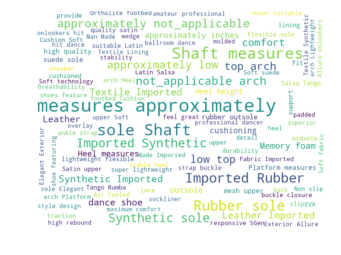

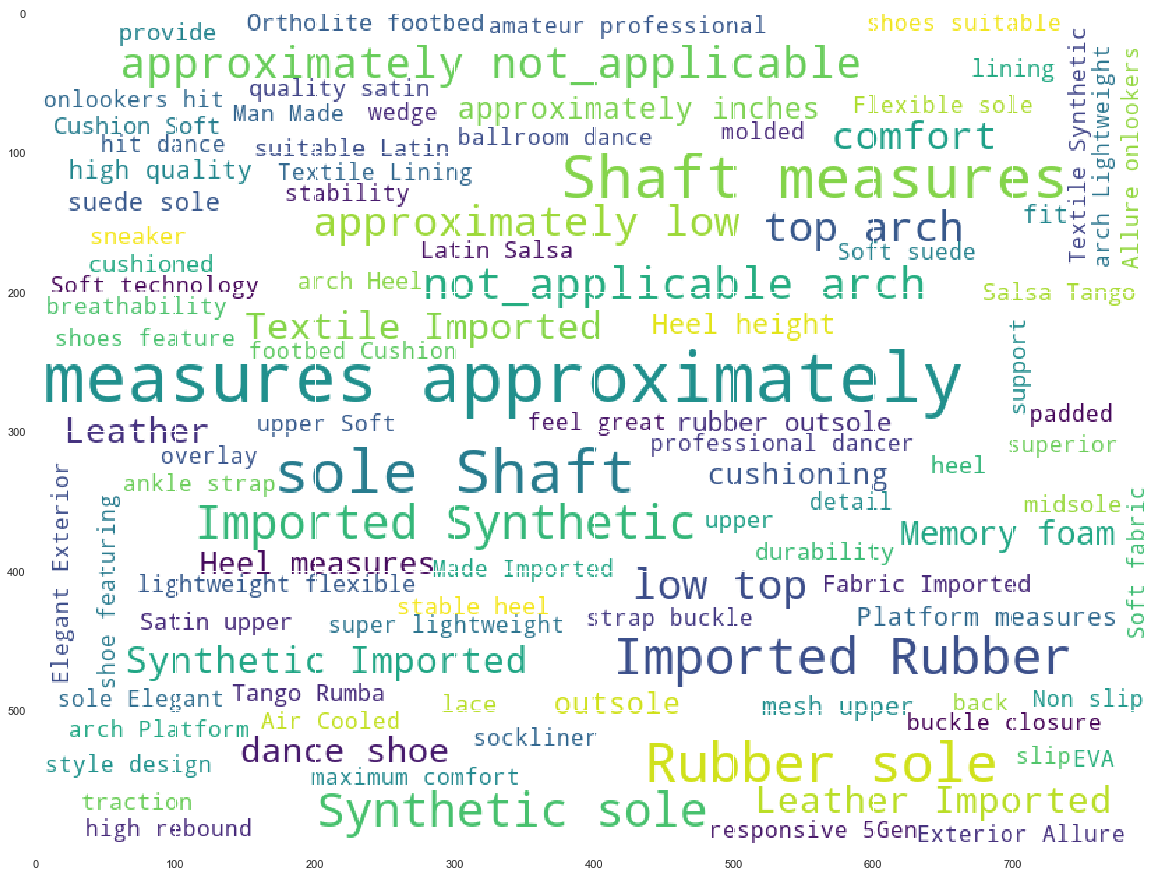

In [83]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", width = 800, height = 600).generate(' '.join(dataset['product_features']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure( figsize=(20,20) )
plt.imshow(wordcloud)

#WordCloud(width=800, height=400)

In [92]:
dataset_fashion = dataset.loc[dataset["shoe_category_final"]=='Fashion Sneakers']

In [93]:
dataset_running = dataset.loc[dataset["shoe_category_final"]=='Road Running']

In [94]:
dataset_ballet = dataset.loc[dataset["shoe_category_final"]=='Ballet & Dance']

In [86]:
dataset["shoe_category_final"].value_counts()

Fashion Sneakers              63
Shoes                         57
Ballet & Dance                43
Road Running                  35
Flats                         32
Pumps                         31
Loafers & Slip-Ons            30
Walking                       28
Mules & Clogs                  7
Oxfords                        5
Fitness & Cross-Training       5
Golf                           5
Health Care & Food Service     4
Slippers                       3
Platforms & Wedges             3
Heeled Sandals                 2
Industrial & Construction      2
Running                        2
Ankle & Bootie                 2
Skateboarding                  1
Slides                         1
Sneakers                       1
Flip-Flops                     1
Sandals                        1
Water Shoes                    1
Soccer                         1
Volleyball                     1
Boots                          1
Hiking Shoes                   1
Rain Footwear                  1
Tennis & R

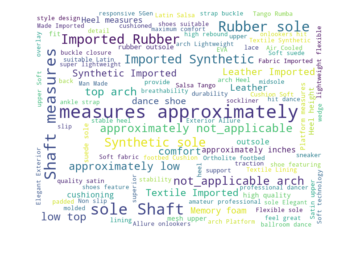

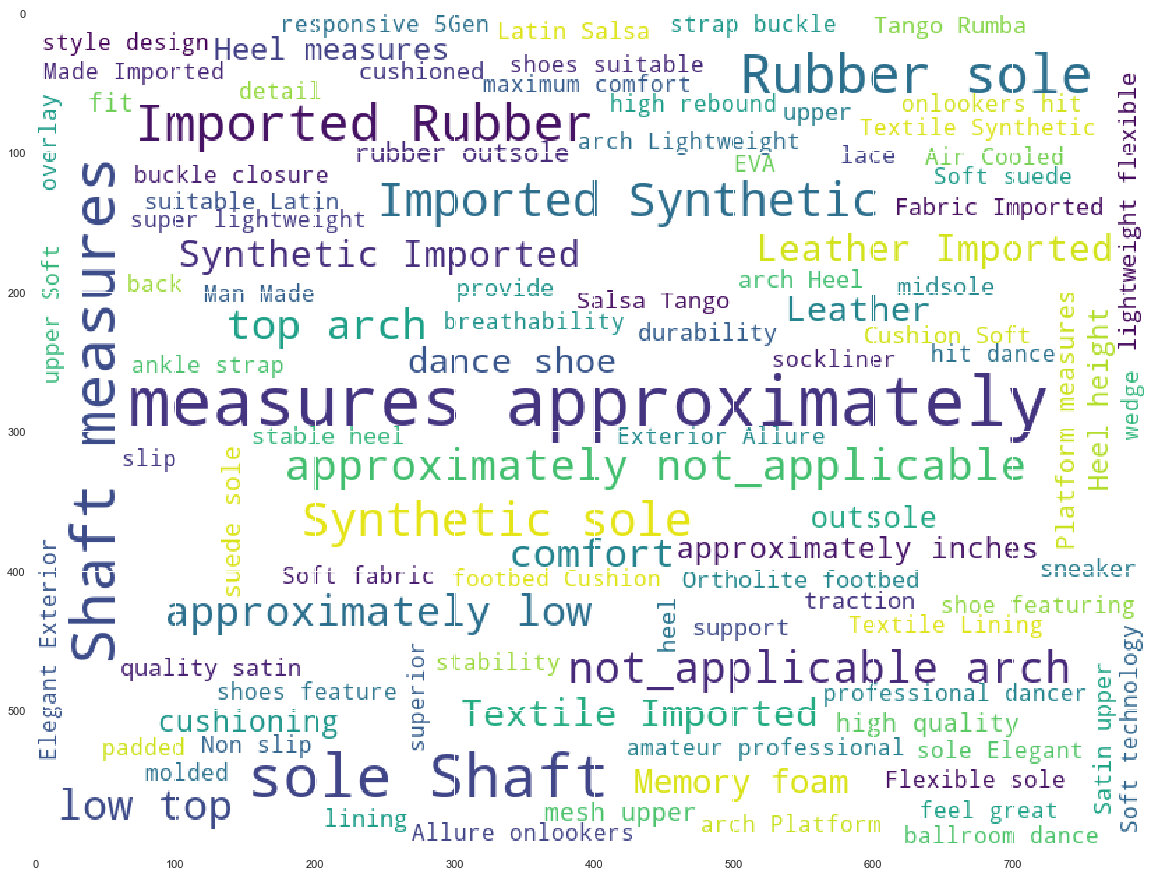

In [95]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", width = 800, height = 600).generate(' '.join(dataset['product_features']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure( figsize=(20,20) )
plt.imshow(wordcloud)

#WordCloud(width=800, height=400)

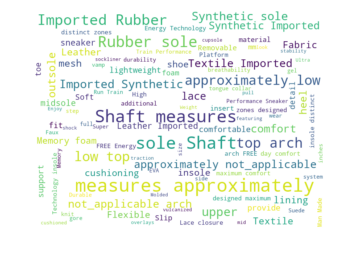

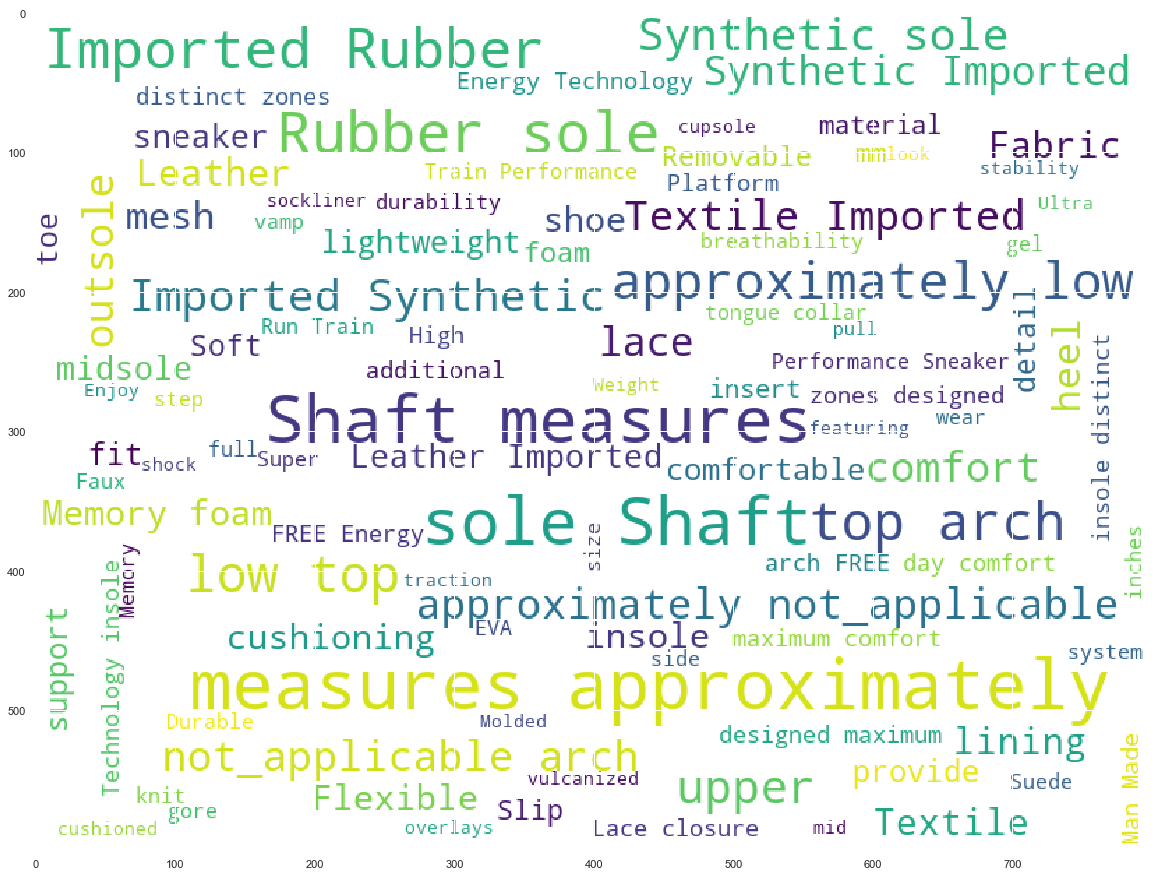

In [96]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", width = 800, height = 600).generate(' '.join(dataset_fashion['product_features']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure( figsize=(20,20) )
plt.imshow(wordcloud)

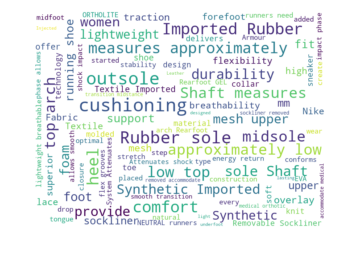

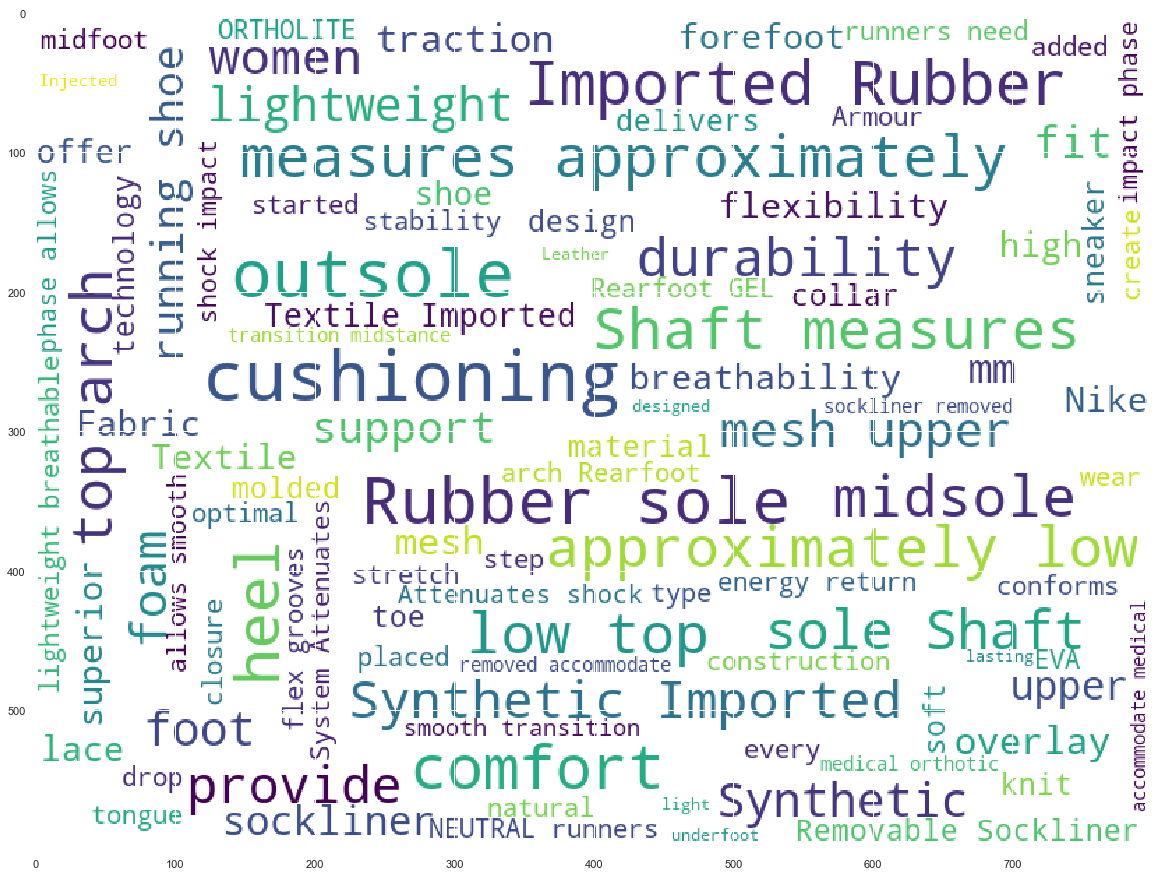

In [97]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", width = 800, height = 600).generate(' '.join(dataset_running['product_features']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure( figsize=(20,20) )
plt.imshow(wordcloud)

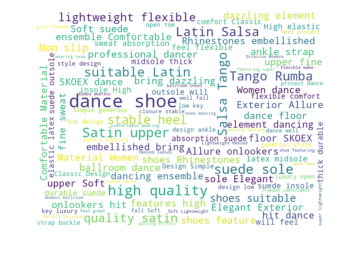

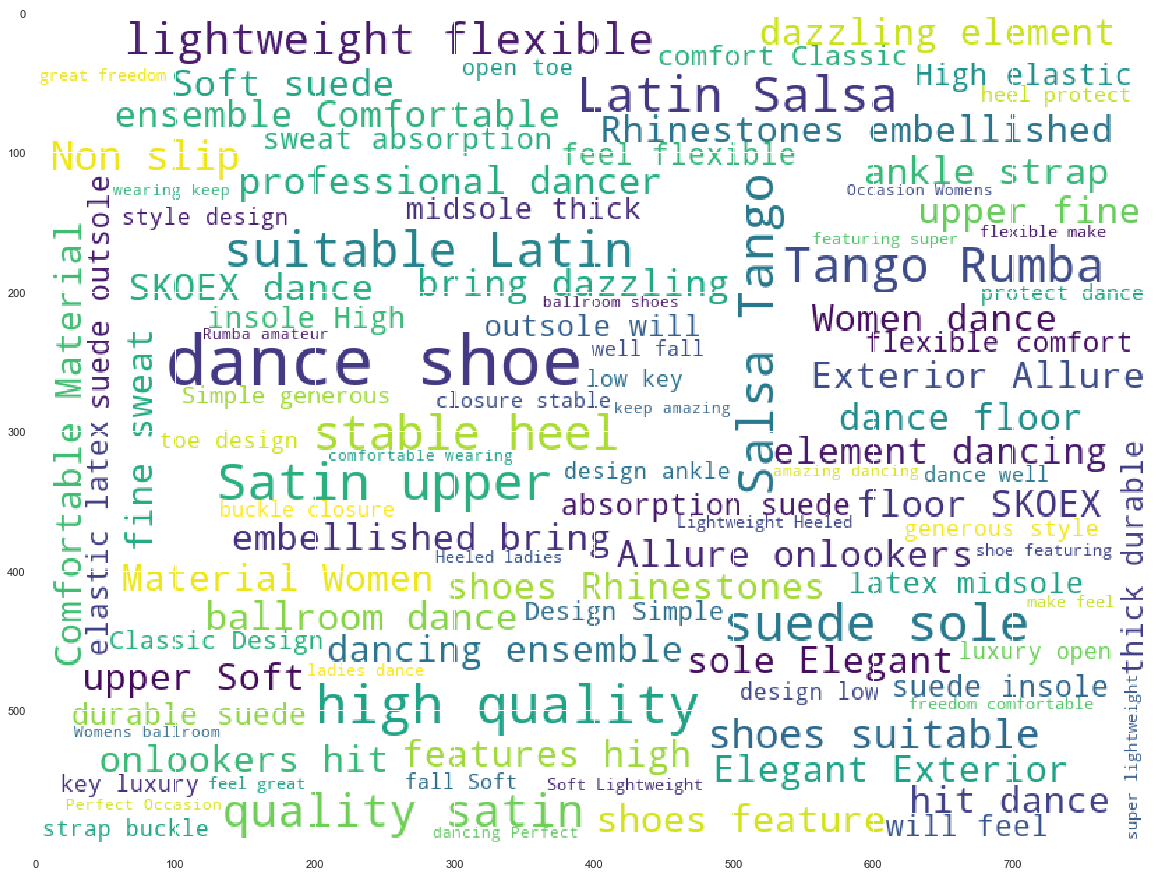

In [98]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", width = 800, height = 600).generate(' '.join(dataset_ballet['product_features']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.figure( figsize=(20,20) )
plt.imshow(wordcloud)

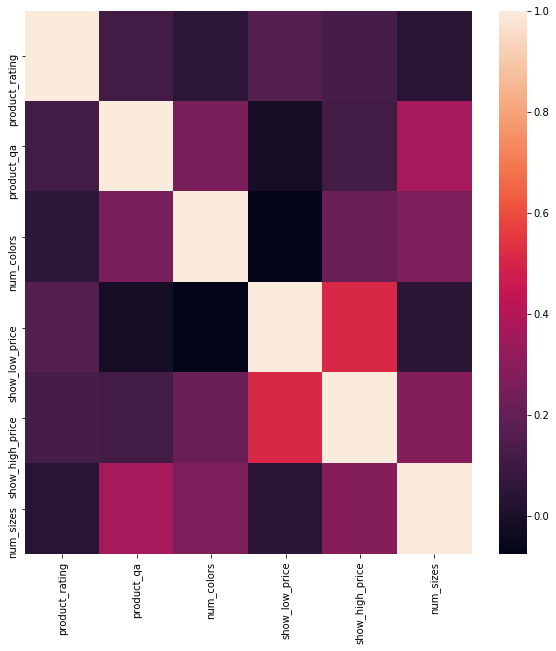

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

corr = dataset.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [61]:
plt.figure(figsize=(10, 10))

corr_small = dataset.corr()
corr_small.style.background_gradient(cmap='coolwarm')

,product_rating,product_qa,num_colors,show_low_price,show_high_price,num_sizes
product_rating,1,0.115252,0.0536986,0.159727,0.125138,0.0394069
product_qa,0.115252,1,0.252759,-0.0156235,0.115355,0.366884
num_colors,0.0536986,0.252759,1,-0.0762772,0.213955,0.267602
show_low_price,0.159727,-0.0156235,-0.0762772,1,0.512204,0.0480365
show_high_price,0.125138,0.115355,0.213955,0.512204,1,0.284485
num_sizes,0.0394069,0.366884,0.267602,0.0480365,0.284485,1


<Figure size 720x720 with 0 Axes>

In [41]:
dataset.num_ratings = dataset.num_ratings.replace({",",""}, regex=True)

In [262]:
dataset['num_ratings'] = dataset['num_ratings'].str.replace(',', '')

In [268]:
dataset['num_ratings'] = pd.to_numeric(dataset['num_ratings'])

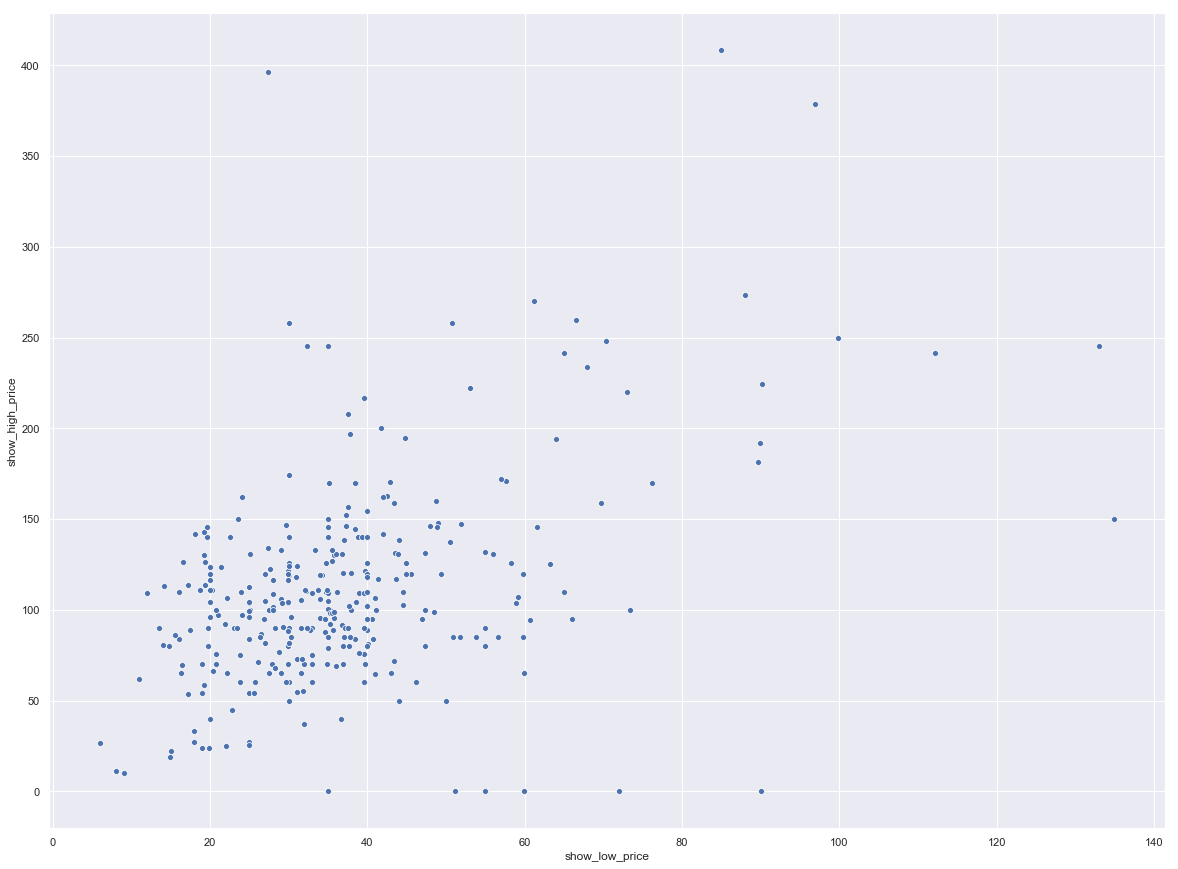

In [70]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
ax = sns.scatterplot(x='show_low_price', y = 'show_high_price', data = dataset)


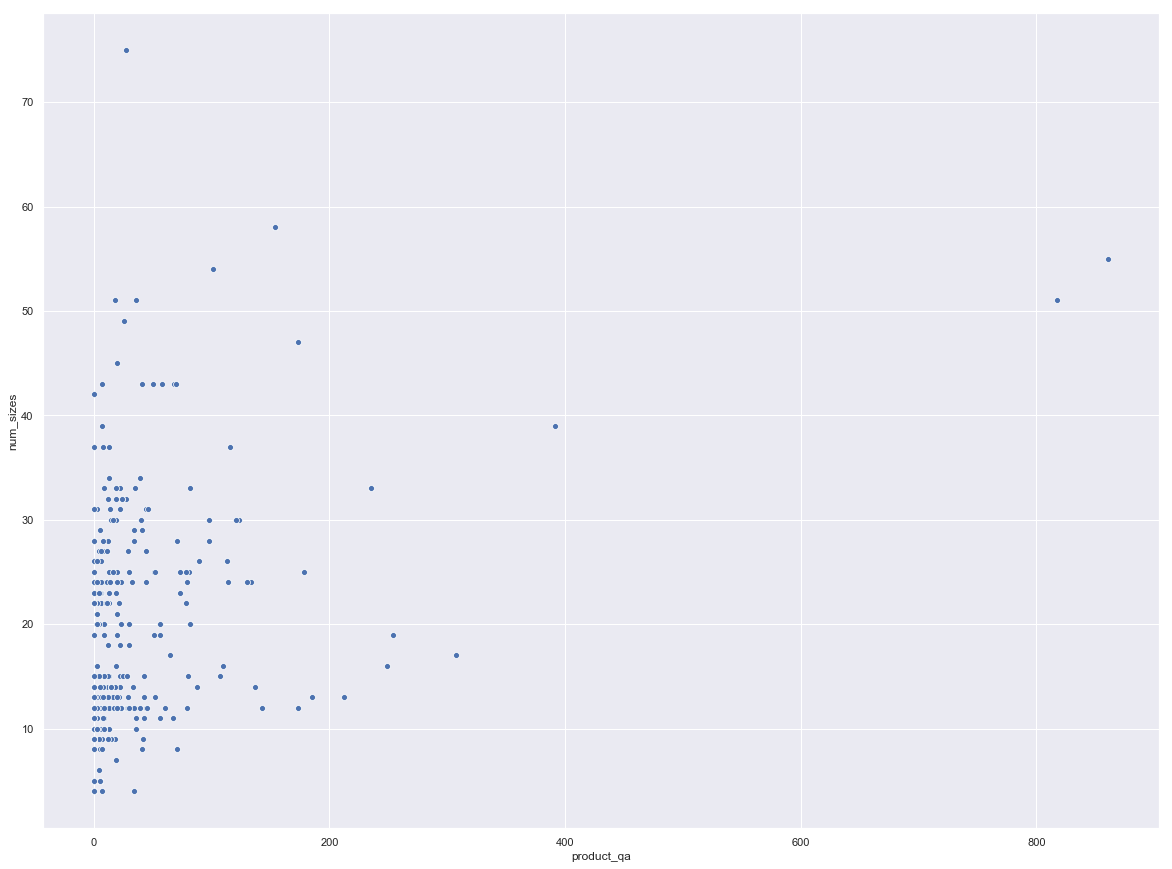

In [71]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
ax = sns.scatterplot(x='product_qa', y = 'num_sizes', data = dataset)

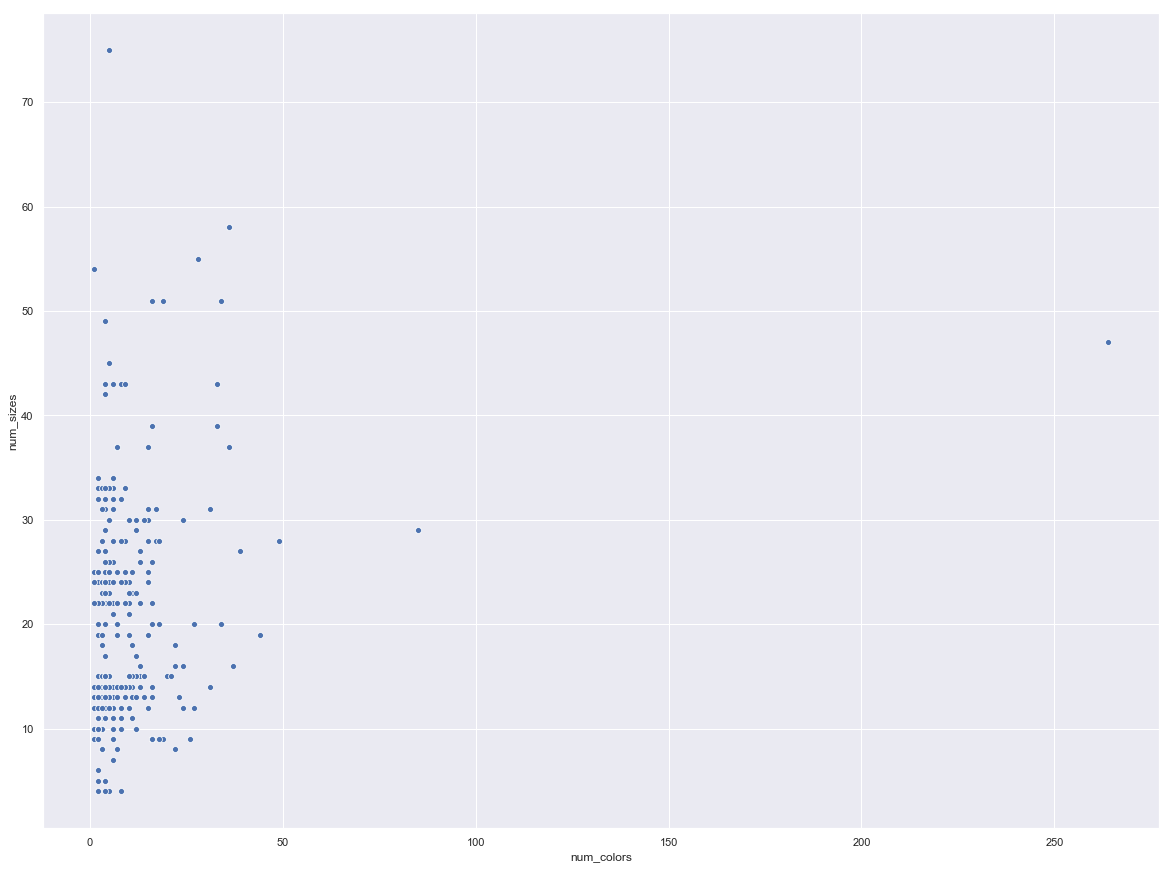

In [73]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
ax = sns.scatterplot(x='num_colors', y = 'num_sizes', data = dataset)

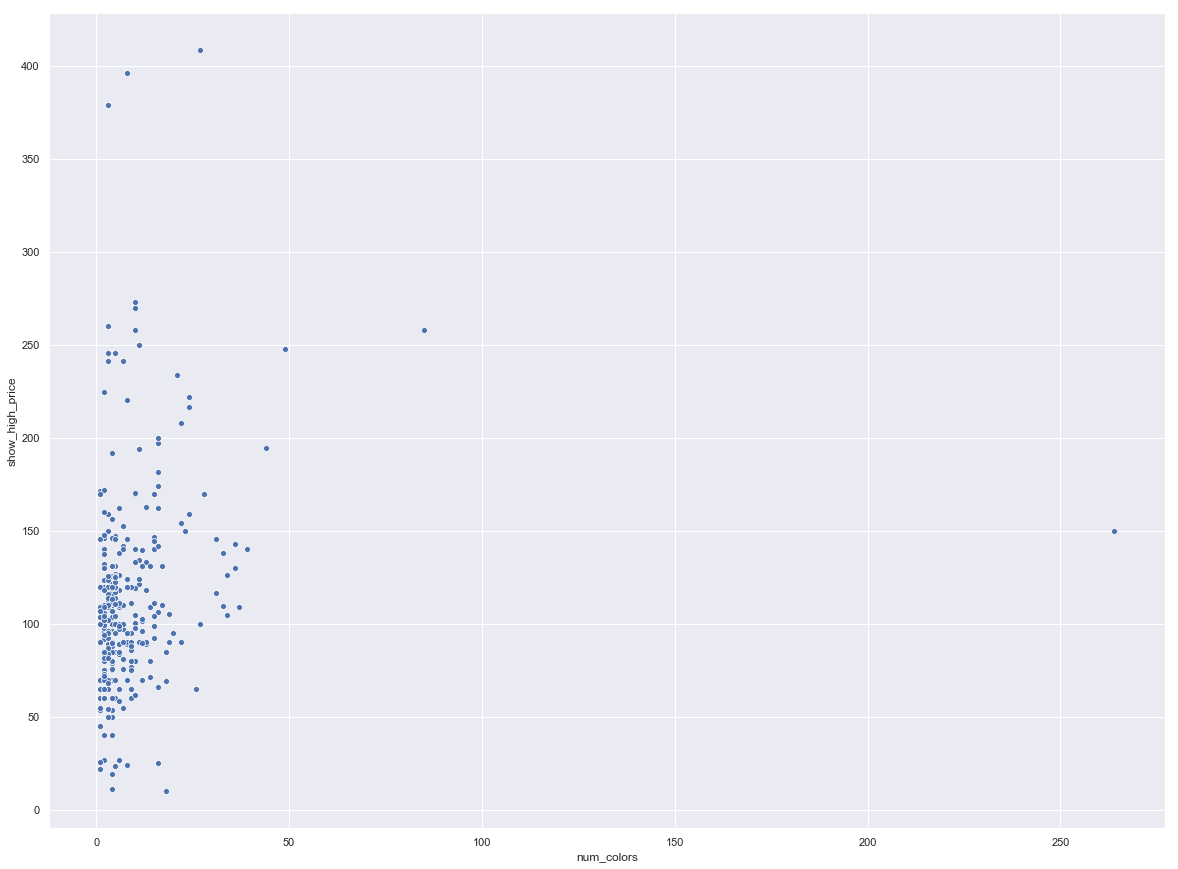

In [75]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
ax = sns.scatterplot(x='num_colors', y = 'show_high_price', data = dataset)

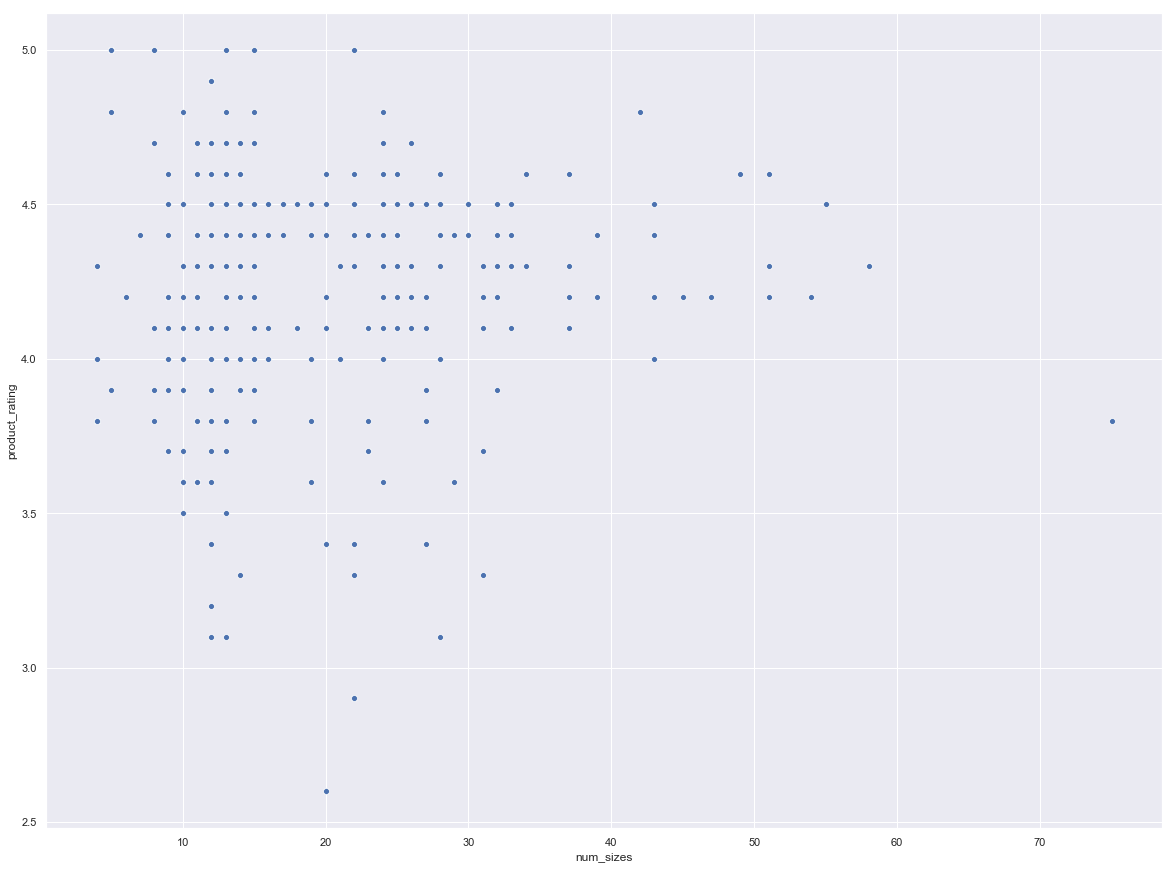

In [76]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
ax = sns.scatterplot(x='num_sizes', y = 'product_rating', data = dataset)

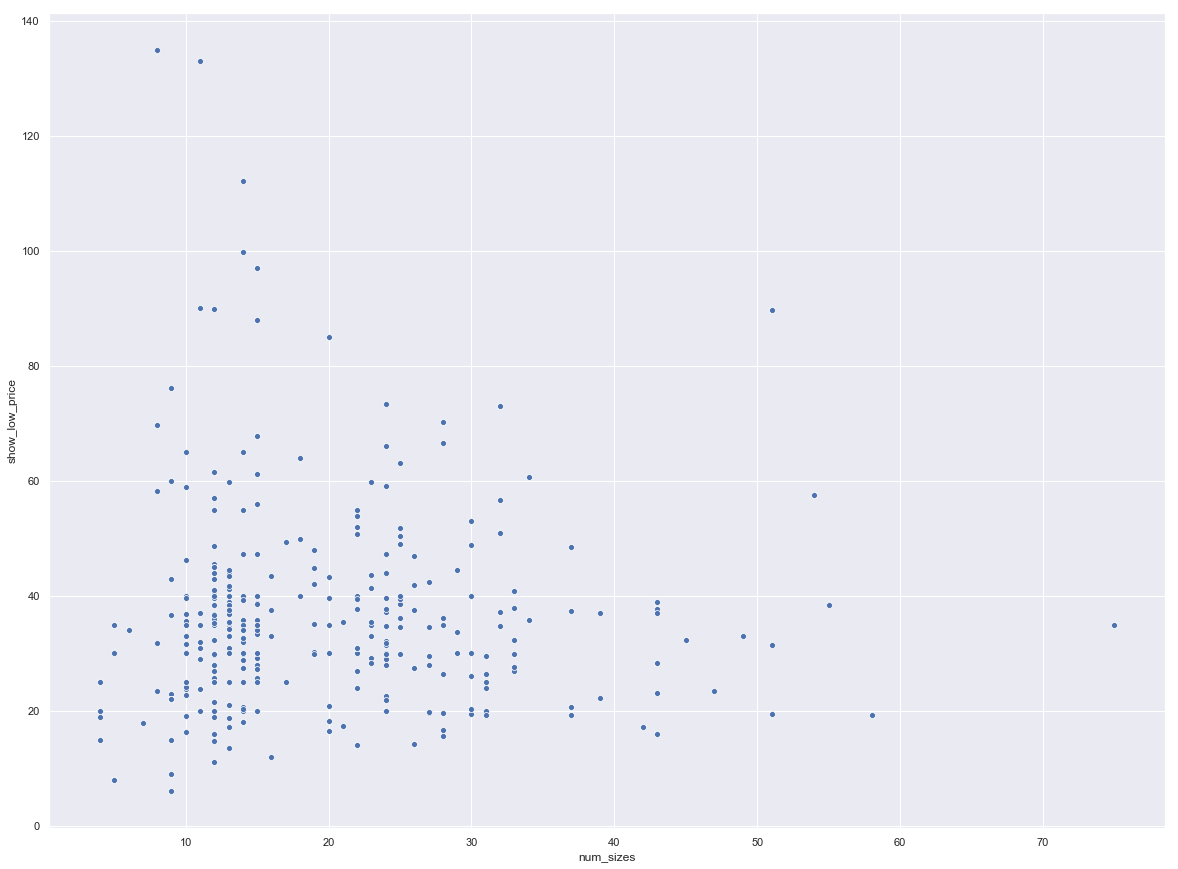

In [77]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
ax = sns.scatterplot(x='num_sizes', y = 'show_low_price', data = dataset)

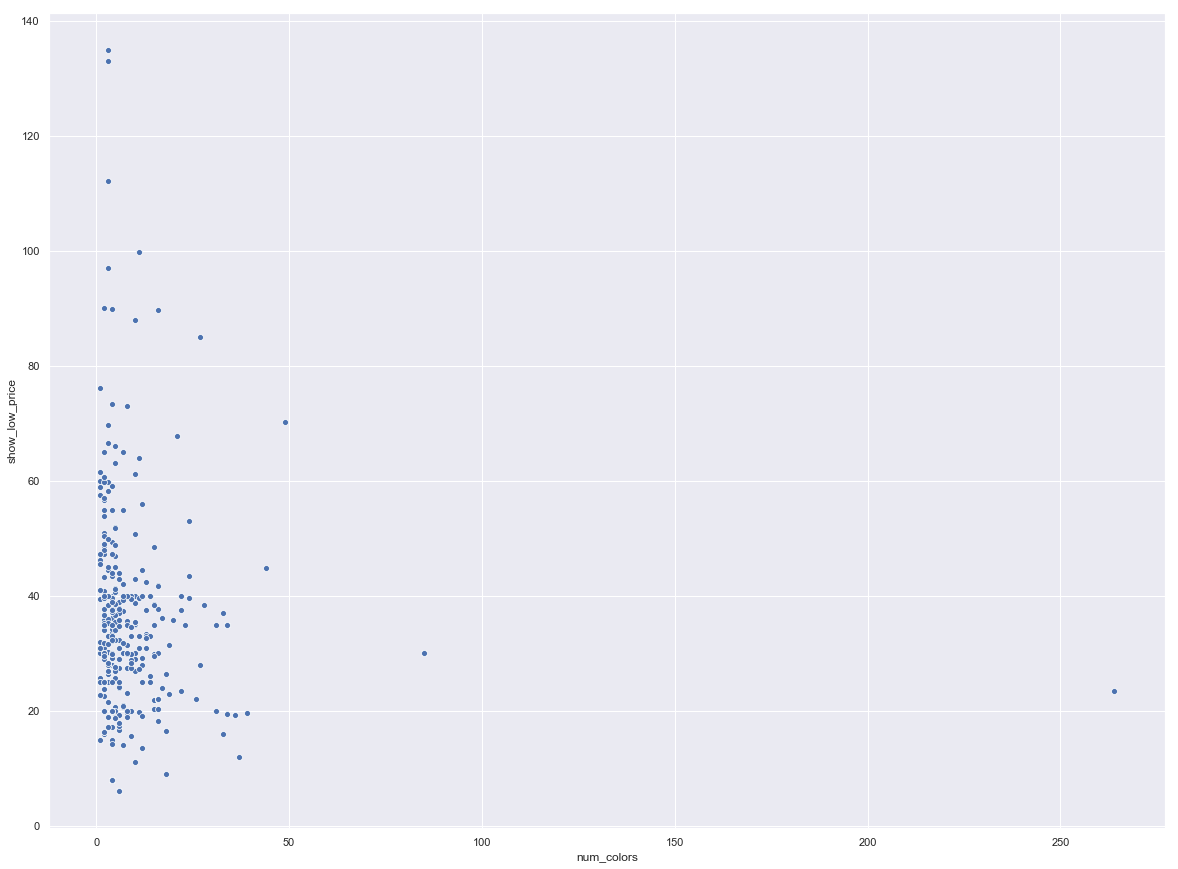

In [99]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
ax = sns.scatterplot(x='num_colors', y = 'show_low_price', data = dataset)

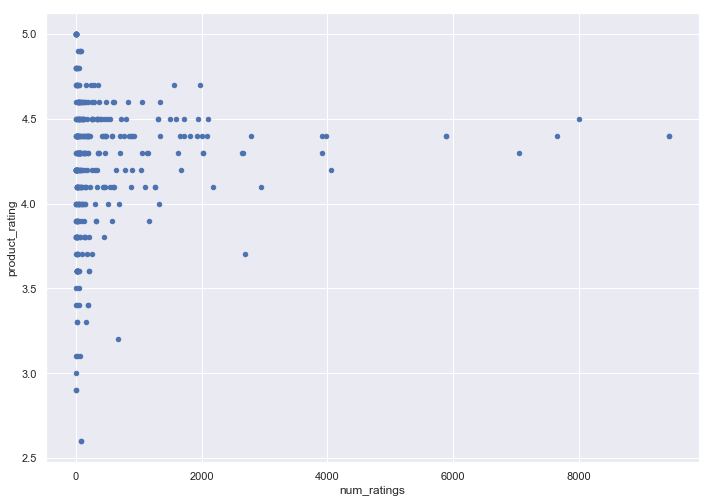

In [284]:
dataset.plot.scatter(x='num_ratings', y = 'product_rating')

In [256]:
type(dataset.num_ratings[0])

str

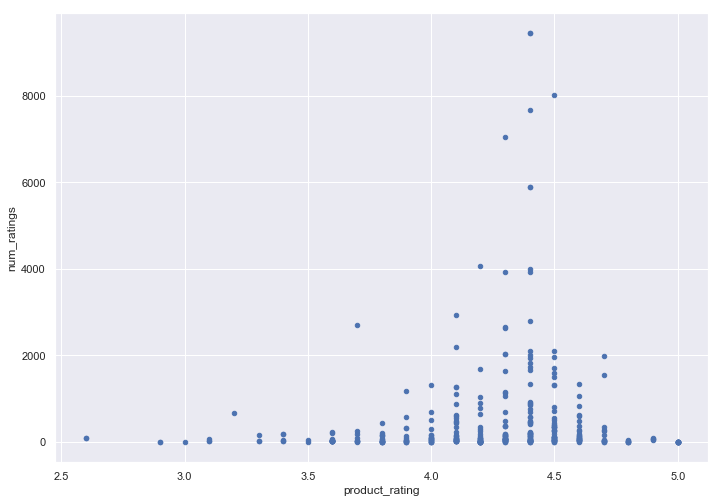

In [271]:
ax1 = dataset.plot.scatter(x='product_rating', y = 'num_ratings')

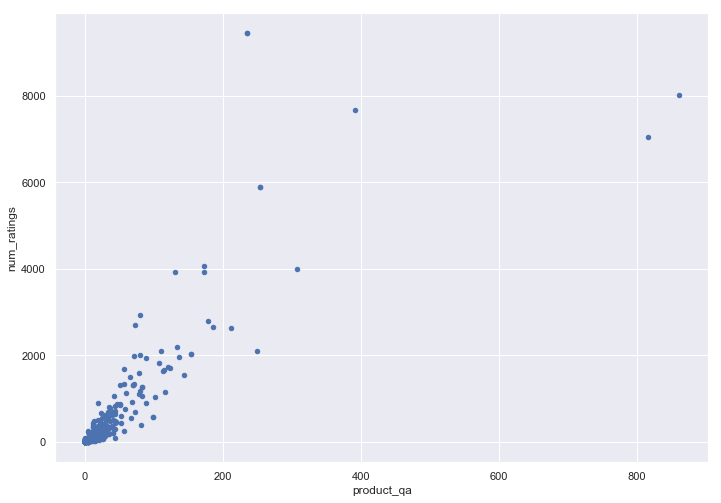

In [274]:
ax1 = dataset.plot.scatter(x='product_qa', y = 'num_ratings')

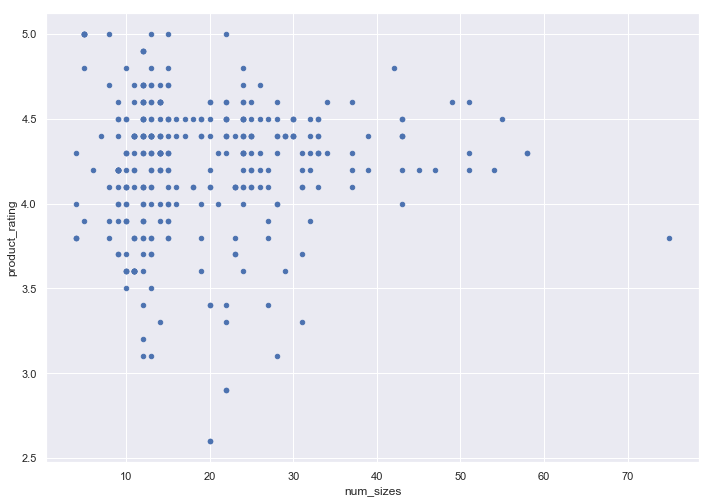

In [275]:
ax2 = dataset.plot.scatter(x = 'num_sizes', y = 'product_rating')

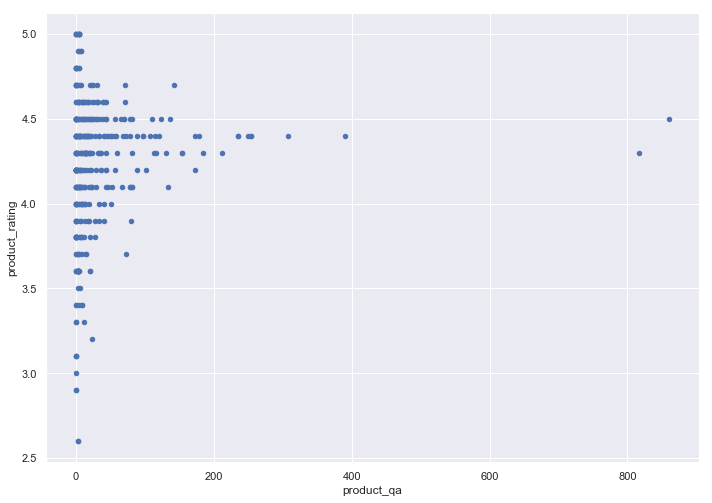

In [277]:
ax3 = dataset.plot.scatter(x = 'product_qa', y = 'product_rating')

In [147]:
dataset.head()

,product_asin,product_name,product_sale_price,product_category,product_brand,product_rating,num_ratings,product_sizes,product_colors,product_features,product_terms,product_qa,shoe_gender,shoe_category_fixed,shoe_category_final,num_sizes,if_wide,if_narrow,show_low_price,show_high_price
0,B07D3G9ZNG,Brooks Women's Levitate 2,$99.80 - $249.95Lower price available on selec...,"Women,Shoes,Athletic,Running,Road Running",NaN,4.4,163,"5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12","Coral/Blue/Black,Aster/Purple/Blue,Pink/Black/...","Fabric,Imported,Rubber sole,The Brooks® Levita...","toe box,second pair,love these shoes,true to s...",22,Women,"[Shoes, Athletic, Running, Road Running]",Road Running,14.0,False,False,99.80,249.95
1,B07VKQWZR4,Nike Women's Viale Running Shoe,$33.39 - $133.00,"Women,Shoes,Athletic,Running,Road Running",NaN,4.0,109,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12","Light Cream/Pure Platinum - White,Wolf Grey/Wh...","100% Leather and Synthetic,Imported,Rubber sol...",NaN,13,Women,"[Shoes, Athletic, Running, Road Running]",Road Running,15.0,False,False,33.39,133.00
2,B07X92DWVM,adidas Originals Women's Superstar Sneaker,$38.55 - $169.76,"Women,Shoes,Fashion Sneakers",NaN,4.5,392,"1,1.5,2,2.5,3,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10...","Scarlet/Scarlet/White,White/Ash Green/Silver M...","100% full grain leather,Imported,N/A,Rubber so...",NaN,81,Women,"[Shoes, Fashion Sneakers]",Fashion Sneakers,25.0,False,False,38.55,169.76
3,B077GB5R7R,"ECCO Women?s, Biom Fjuel Blaze Lace up Sneaker",$69.68 - $159.06Lower price available on selec...,"Women,Shoes,Athletic,Walking",NaN,4.1,26,"4-4.5,5-5.5,7-7.5,8-8.5,9-9.5,10-10.5,11-11.5,...","Black/Black,Concrete/White,Dark Shadow/Dark Sh...","Synthetic,Imported,Rubber sole,The flexible Bi...",NaN,5,Women,"[Shoes, Athletic, Walking]",Walking,8.0,False,False,69.68,159.06
4,B01KLTBMLA,adidas Women's W Tech Response Golf Shoe,$29.99 - $140.34Lower price available on selec...,"Women,Shoes,Athletic,Golf",adidas,4.4,222,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11,9.5 M US","Black/Silver Metallic/Grey Five,Clear/Grey,Whi...","Microfiber Leather/Climastorm,Imported,Synthet...",NaN,21,Women,"[Shoes, Athletic, Golf]",Golf,13.0,False,False,29.99,140.34


In [182]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
import nltk

In [178]:
text = ' '.join(dataset['product_features'])

In [179]:
text

'Fabric,Imported,Rubber sole,The Brooks® Levitate 2 running shoe is designed with the highest energy return possible so you will rise to every challenge you meet on the road. 100% Leather and Synthetic,Imported,Rubber sole,Shaft measures approximately low-top from arch,Ultra-light design inspired by marathon runners.,Mesh upper allows for breathability.,Outsole lugs surround a hollowed core to optimize stability.,Injected foam (IU) midsole for cushioning and long-lasting comfort,Microbranding on the tongue middle. Hidden branding under the heel tab -- lift up to see a Swoosh design trademark underneath. 100% full grain leather,Imported,N/A,Rubber sole,Shaft measures approximately 3.2" from arch,Boot opening measures approximately 11" around,Retro-styled lace-up fashion sneaker featuring classic three-stripe detailing and heritage shell toe,Removable insole,Mesh lining,Herringbone-pattern rubber cupsole Synthetic,Imported,Rubber sole,The flexible Biom Fjuel Tie gives you the boost to ow

In [216]:
# split into words
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['fabric', 'imported', 'rubber', 'sole', 'levitate', 'running', 'shoe', 'designed', 'highest', 'energy', 'return', 'possible', 'rise', 'every', 'challenge', 'meet', 'road', 'leather', 'synthetic', 'imported', 'rubber', 'sole', 'shaft', 'measures', 'approximately', 'lowtop', 'arch', 'ultralight', 'design', 'inspired', 'marathon', 'runners', 'mesh', 'upper', 'allows', 'breathability', 'outsole', 'lugs', 'surround', 'hollowed', 'core', 'optimize', 'stability', 'injected', 'foam', 'iu', 'midsole', 'cushioning', 'longlasting', 'comfort', 'microbranding', 'tongue', 'middle', 'hidden', 'branding', 'heel', 'tab', 'lift', 'see', 'swoosh', 'design', 'trademark', 'underneath', 'full', 'grain', 'leather', 'imported', 'na', 'rubber', 'sole', 'shaft', 'measures', 'approximately', 'arch', 'boot', 'opening', 'measures', 'approximately', 'around', 'retrostyled', 'laceup', 'fashion', 'sneaker', 'featuring', 'classic', 'threestripe', 'detailing', 'heritage', 'shell', 'toe', 'removable', 'insole', 'mesh',

In [217]:
from collections import Counter
from pprint import pprint
bigrams = Counter(zip(words,words[1:]))
pprint(bigrams)

Counter({('measures', 'approximately'): 296,
         ('shaft', 'measures'): 208,
         ('sole', 'shaft'): 204,
         ('rubber', 'sole'): 166,
         ('imported', 'rubber'): 150,
         ('synthetic', 'sole'): 127,
         ('imported', 'synthetic'): 125,
         ('approximately', 'notapplicable'): 105,
         ('notapplicable', 'arch'): 104,
         ('approximately', 'lowtop'): 91,
         ('lowtop', 'arch'): 90,
         ('textile', 'imported'): 74,
         ('leather', 'imported'): 67,
         ('synthetic', 'imported'): 62,
         ('memory', 'foam'): 58,
         ('heel', 'measures'): 51,
         ('approximately', 'inches'): 47,
         ('dance', 'shoes'): 47,
         ('heel', 'height'): 43,
         ('rubber', 'outsole'): 41,
         ('platform', 'measures'): 36,
         ('suede', 'sole'): 33,
         ('mesh', 'upper'): 30,
         ('satin', 'upper'): 30,
         ('lightweight', 'flexible'): 30,
         ('ortholite', 'footbed'): 29,
         ('cushion', 'so

         ('fit', 'rubber'): 2,
         ('foam', 'leather'): 2,
         ('delivers', 'optimal'): 2,
         ('durability', 'flywire'): 2,
         ('laces', 'dynamic'): 2,
         ('dynamic', 'fit'): 2,
         ('fit', 'dropin'): 2,
         ('dropin', 'midsole'): 2,
         ('midsole', 'offers'): 2,
         ('flexible', 'forefoot'): 2,
         ('thin', 'web'): 2,
         ('web', 'rubber'): 2,
         ('rubber', 'stretches'): 2,
         ('stretches', 'outsole'): 2,
         ('outsole', 'wrap'): 2,
         ('wrap', 'midfoot'): 2,
         ('midfoot', 'optimal'): 2,
         ('inches', 'stretch'): 2,
         ('bed', 'textile'): 2,
         ('footbed', 'durable'): 2,
         ('pull', 'loop'): 2,
         ('pointed', 'toe'): 2,
         ('recommended', 'multisport'): 2,
         ('multisport', 'training'): 2,
         ('midsole', 'stepin'): 2,
         ('arch', 'classic'): 2,
         ('construction', 'better'): 2,
         ('socklike', 'fit'): 2,
         ('outsole', 'lightwe

         ('soft', 'ortholite'): 1,
         ('ortholite', 'heel'): 1,
         ('height', 'suede'): 1,
         ('soft', 'leather'): 1,
         ('clarks', 'artisan'): 1,
         ('artisan', 'ortholite'): 1,
         ('rubber', 'imported'): 1,
         ('approximately', 'chelsea'): 1,
         ('chelsea', 'rain'): 1,
         ('rain', 'boot'): 1,
         ('boot', 'featuring'): 1,
         ('featuring', 'pull'): 1,
         ('loop', 'back'): 1,
         ('back', 'deep'): 1,
         ('deep', 'elastic'): 1,
         ('elastic', 'goring'): 1,
         ('goring', 'sides'): 1,
         ('sides', 'textile'): 1,
         ('lining', 'product'): 1,
         ('product', 'slip'): 1,
         ('slip', 'closure'): 1,
         ('closure', 'padded'): 1,
         ('footbed', 'beibestcoat'): 1,
         ('arch', 'fierce'): 1,
         ('fierce', 'runtrain'): 1,
         ('sneaker', 'textile'): 1,
         ('heel', 'hillo'): 1,
         ('sole', 'pointed'): 1,
         ('toe', 'textile'): 1,
         

         ('laces', 'features'): 1,
         ('features', 'medial'): 1,
         ('eyelets', 'tie'): 1,
         ('tie', 'design'): 1,
         ('design', 'elastic'): 1,
         ('elastic', 'collar'): 1,
         ('collar', 'pull'): 1,
         ('loop', 'fit'): 1,
         ('fit', 'tip'): 1,
         ('tip', 'true'): 1,
         ('size', 'recommend'): 1,
         ('recommend', 'normal'): 1,
         ('normal', 'size'): 1,
         ('size', 'canvas'): 1,
         ('upper', 'inventory'): 1,
         ('inventory', 'may'): 1,
         ('may', 'either'): 1,
         ('either', 'logo'): 1,
         ('logo', 'star'): 1,
         ('star', 'logo'): 1,
         ('logo', 'without'): 1,
         ('without', 'vendor'): 1,
         ('vendor', 'transitioned'): 1,
         ('transitioned', 'style'): 1,
         ('style', 'na'): 1,
         ('arch', 'breathable'): 1,
         ('breathable', 'leather'): 1,
         ('lining', 'slipon'): 1,
         ('ability', 'fabric'): 1,
         ('charitable', 'text

         ('average', 'comfort'): 1,
         ('comfort', 'cushionig'): 1,
         ('cushionig', 'heeluxetm'): 1,
         ('heeluxetm', 'occupational'): 1,
         ('occupational', 'shoe'): 1,
         ('shoe', 'research'): 1,
         ('research', 'april'): 1,
         ('april', 'memory'): 1,
         ('fit', 'anticompression'): 1,
         ('anticompression', 'insole'): 1,
         ('outsole', 'drilex'): 1,
         ('drilex', 'moisturewicking'): 1,
         ('moisturewicking', 'lining'): 1,
         ('lining', 'aegis'): 1,
         ('aegis', 'microbe'): 1,
         ('microbe', 'shield'): 1,
         ('shield', 'control'): 1,
         ('control', 'odor'): 1,
         ('odor', 'suede'): 1,
         ('sole', 'comfortincluded'): 1,
         ('comfortincluded', 'authentic'): 1,
         ('authentic', 'brand'): 1,
         ('new', 'durable'): 1,
         ('durable', 'original'): 1,
         ('packaging', 'leather'): 1,
         ('design', 'roomy'): 1,
         ('roomy', 'comfortable'): 

In [225]:
bigrams_df = pd.DataFrame.from_dict(bigrams, orient='index').reset_index()
bigrams_df = bigrams_df.rename(columns={'index':'bigram', 0:'count'})
bigrams_df = bigrams_df.sort_values(by=['count'], ascending = False)
bigrams_df_top10 = bigrams_df.head(10)
bigrams_df_top10

,bigram,count
21,"(measures, approximately)",296
20,"(shaft, measures)",208
19,"(sole, shaft)",204
2,"(rubber, sole)",166
1,"(imported, rubber)",150
101,"(synthetic, sole)",127
100,"(imported, synthetic)",125
342,"(approximately, notapplicable)",105
343,"(notapplicable, arch)",104
22,"(approximately, lowtop)",91


In [219]:
trigrams = Counter(zip(words,words[1:], words[2:]))
pprint(trigrams)

Counter({('shaft', 'measures', 'approximately'): 208,
         ('sole', 'shaft', 'measures'): 204,
         ('imported', 'rubber', 'sole'): 150,
         ('imported', 'synthetic', 'sole'): 125,
         ('rubber', 'sole', 'shaft'): 105,
         ('measures', 'approximately', 'notapplicable'): 105,
         ('approximately', 'notapplicable', 'arch'): 104,
         ('synthetic', 'sole', 'shaft'): 93,
         ('measures', 'approximately', 'lowtop'): 91,
         ('approximately', 'lowtop', 'arch'): 90,
         ('heel', 'measures', 'approximately'): 51,
         ('measures', 'approximately', 'inches'): 45,
         ('synthetic', 'imported', 'rubber'): 43,
         ('platform', 'measures', 'approximately'): 36,
         ('textile', 'imported', 'synthetic'): 35,
         ('leather', 'imported', 'rubber'): 33,
         ('textile', 'imported', 'rubber'): 31,
         ('leather', 'imported', 'synthetic'): 30,
         ('salsa', 'tango', 'rumba'): 29,
         ('suitable', 'latin', 'salsa'): 2

         ('lightweight', 'flexible', 'sole'): 2,
         ('textile', 'imported', 'fabric'): 2,
         ('outsole', 'fabric', 'imported'): 2,
         ('insole', 'designed', 'allday'): 2,
         ('designed', 'stability', 'balance'): 2,
         ('highly', 'flexible', 'outsole'): 2,
         ('outsole', 'man', 'made'): 2,
         ('go', 'cushioning', 'highrebound'): 2,
         ('cushioning', 'highrebound', 'ultra'): 2,
         ('every', 'step', 'skechers'): 2,
         ('step', 'skechers', 'air'): 2,
         ('providing', 'easy', 'wearability'): 2,
         ('insole', 'synthetic', 'imported'): 2,
         ('foam', 'insole', 'heel'): 2,
         ('upper', 'imported', 'rubber'): 2,
         ('insert', 'leather', 'imported'): 2,
         ('stacked', 'heel', 'comfort'): 2,
         ('approximately', 'inches', 'lifestride'): 2,
         ('fabric', 'synthetic', 'imported'): 2,
         ('insole', 'nonmarking', 'outsole'): 2,
         ('outsole', 'textile', 'synthetic'): 2,
         ('a

         ('rubber', 'traction', 'sole'): 1,
         ('traction', 'sole', 'added'): 1,
         ('sole', 'added', 'stability'): 1,
         ('added', 'stability', 'padded'): 1,
         ('stability', 'padded', 'tongue'): 1,
         ('tongue', 'collar', 'faux'): 1,
         ('collar', 'faux', 'leather'): 1,
         ('leather', 'mesh', 'upper'): 1,
         ('mesh', 'upper', 'supercomfortable'): 1,
         ('upper', 'supercomfortable', 'gel'): 1,
         ('supercomfortable', 'gel', 'cushion'): 1,
         ('gel', 'cushion', 'textile'): 1,
         ('cushion', 'textile', 'imported'): 1,
         ('pressure', 'fatigue', 'knit'): 1,
         ('fatigue', 'knit', 'upper'): 1,
         ('knit', 'upper', 'twin'): 1,
         ('upper', 'twin', 'gore'): 1,
         ('twin', 'gore', 'panels'): 1,
         ('gore', 'panels', 'extra'): 1,
         ('panels', 'extra', 'flexibility'): 1,
         ('extra', 'flexibility', 'flexible'): 1,
         ('flexibility', 'flexible', 'durable'): 1,
         

         ('midsole', 'dualdensity', 'collar'): 1,
         ('dualdensity', 'collar', 'uses'): 1,
         ('collar', 'uses', 'softer'): 1,
         ('uses', 'softer', 'density'): 1,
         ('softer', 'density', 'foam'): 1,
         ('density', 'foam', 'foot'): 1,
         ('foam', 'foot', 'cushioning'): 1,
         ('foot', 'cushioning', 'firmer'): 1,
         ('cushioning', 'firmer', 'density'): 1,
         ('firmer', 'density', 'foam'): 1,
         ('density', 'foam', 'support'): 1,
         ('foam', 'support', 'textile'): 1,
         ('lowtop', 'arch', 'running'): 1,
         ('arch', 'running', 'shoes'): 1,
         ('running', 'shoes', 'pillowsoft'): 1,
         ('shoes', 'pillowsoft', 'cushioning'): 1,
         ('pillowsoft', 'cushioning', 'allday'): 1,
         ('cushioning', 'allday', 'comfort'): 1,
         ('womensspecific', 'fit', 'lace'): 1,
         ('lace', 'closure', 'knit'): 1,
         ('closure', 'knit', 'textile'): 1,
         ('knit', 'textile', 'upper'): 1,
     

         ('laces', 'nonmarking', 'rubber'): 1,
         ('rubber', 'outsole', 'enhances'): 1,
         ('outsole', 'enhances', 'grip'): 1,
         ('enhances', 'grip', 'textile'): 1,
         ('grip', 'textile', 'synthetic'): 1,
         ('lowtop', 'arch', 'versa'): 1,
         ('arch', 'versa', 'foam'): 1,
         ('versa', 'foam', 'cushioning'): 1,
         ('foam', 'cushioning', 'technology'): 1,
         ('cushioning', 'technology', 'grid'): 1,
         ('technology', 'grid', 'technology'): 1,
         ('grid', 'technology', 'durable'): 1,
         ('technology', 'durable', 'rubber'): 1,
         ('rubber', 'outsole', 'supportive'): 1,
         ('outsole', 'supportive', 'upper'): 1,
         ('supportive', 'upper', 'overlays'): 1,
         ('upper', 'overlays', 'fabric'): 1,
         ('overlays', 'fabric', 'imported'): 1,
         ('cradling', 'heel', 'imported'): 1,
         ('heel', 'imported', 'leather'): 1,
         ('shipping', 'synthetic', 'imported'): 1,
         ('lowtop'

         ('flexibility', 'cushioning', 'lightweight'): 1,
         ('cushioning', 'lightweight', 'mesh'): 1,
         ('lightweight', 'mesh', 'upper'): 1,
         ('upper', 'delivers', 'complete'): 1,
         ('delivers', 'complete', 'breathability'): 1,
         ('complete', 'breathability', 'foam'): 1,
         ('breathability', 'foam', 'padding'): 1,
         ('foam', 'padding', 'placed'): 1,
         ('padding', 'placed', 'around'): 1,
         ('placed', 'around', 'ankle'): 1,
         ('ankle', 'collar', 'tongue'): 1,
         ('collar', 'tongue', 'incredibly'): 1,
         ('tongue', 'incredibly', 'comfortable'): 1,
         ('incredibly', 'comfortable', 'fit'): 1,
         ('comfortable', 'fit', 'feel'): 1,
         ('fit', 'feel', 'high'): 1,
         ('feel', 'high', 'rebound'): 1,
         ('high', 'rebound', 'diecut'): 1,
         ('rebound', 'diecut', 'eva'): 1,
         ('diecut', 'eva', 'sockliner'): 1,
         ('eva', 'sockliner', 'built'): 1,
         ('sockliner', 

In [222]:
trigrams_df = pd.DataFrame.from_dict(trigrams, orient='index').reset_index()
trigrams_df = trigrams_df.rename(columns={'index':'trigrams', 0:'count'})
trigrams_df = trigrams_df.sort_values(by=['count'], ascending = False)
trigrams_df_top10 = trigrams_df.head(10)

In [223]:
trigrams_df_top10

,trigrams,count
21,"(shaft, measures, approximately)",208
20,"(sole, shaft, measures)",204
1,"(imported, rubber, sole)",150
104,"(imported, synthetic, sole)",125
365,"(measures, approximately, notapplicable)",105
19,"(rubber, sole, shaft)",105
366,"(approximately, notapplicable, arch)",104
301,"(synthetic, sole, shaft)",93
22,"(measures, approximately, lowtop)",91
23,"(approximately, lowtop, arch)",90


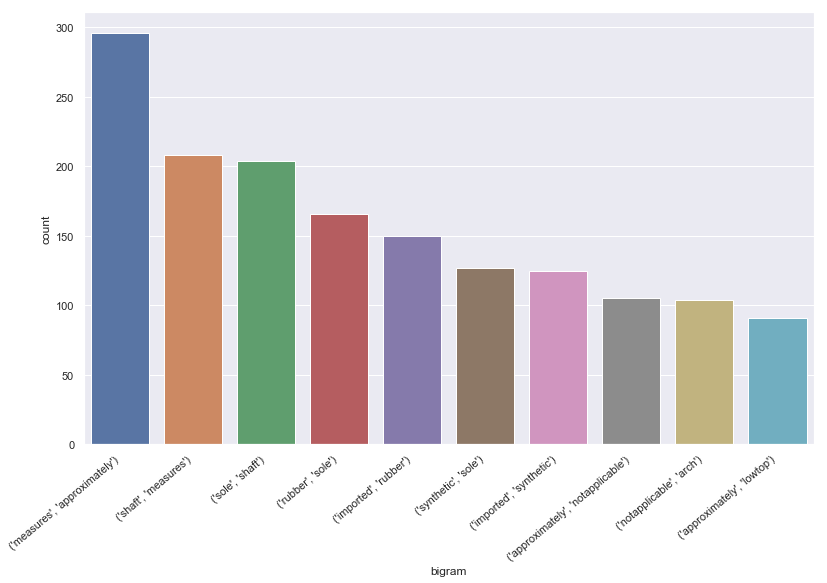

In [239]:
import seaborn as sns
zx = sns.barplot(bigrams_df_top10['bigram'], bigrams_df_top10['count'])
zx.set_xticklabels(zx.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
sns.set(rc={'figure.figsize':(11.7,8.27)})

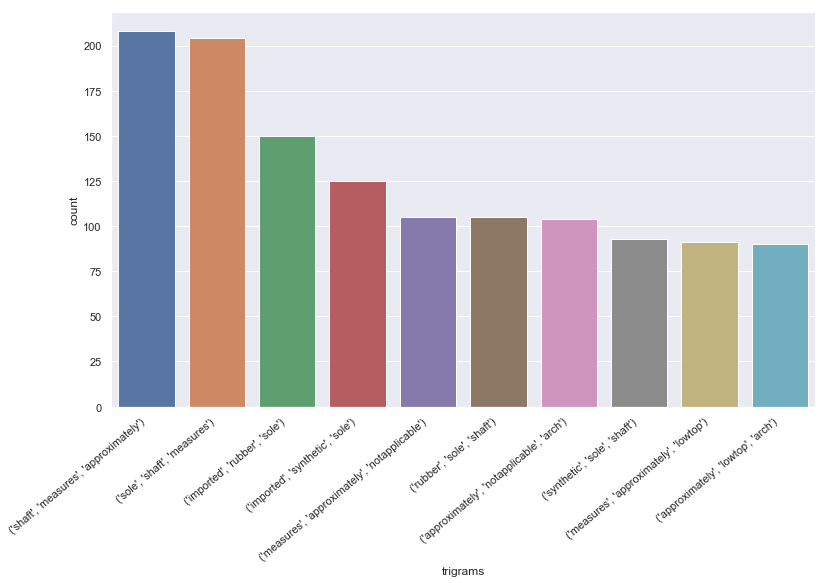

In [237]:
import seaborn as sns
yx = sns.barplot(trigrams_df_top10['trigrams'], trigrams_df_top10['count'])
yx.set_xticklabels(yx.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [280]:
dataset

,product_asin,product_name,product_sale_price,product_category,product_brand,product_rating,num_ratings,product_sizes,product_colors,product_features,...,product_qa,shoe_gender,shoe_category_fixed,shoe_category_final,num_sizes,if_wide,if_narrow,show_low_price,show_high_price,num_colors
0,B07D3G9ZNG,Brooks Women's Levitate 2,$99.80 - $249.95Lower price available on selec...,"Women,Shoes,Athletic,Running,Road Running",NaN,4.4,163,"5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12","Coral/Blue/Black,Aster/Purple/Blue,Pink/Black/...","Fabric,Imported,Rubber sole,The Brooks® Levita...",...,22,Women,"[Shoes, Athletic, Running, Road Running]",Road Running,14.0,False,False,99.80,249.95,11.0
1,B07VKQWZR4,Nike Women's Viale Running Shoe,$33.39 - $133.00,"Women,Shoes,Athletic,Running,Road Running",NaN,4.0,109,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12","Light Cream/Pure Platinum - White,Wolf Grey/Wh...","100% Leather and Synthetic,Imported,Rubber sol...",...,13,Women,"[Shoes, Athletic, Running, Road Running]",Road Running,15.0,False,False,33.39,133.00,13.0
2,B07X92DWVM,adidas Originals Women's Superstar Sneaker,$38.55 - $169.76,"Women,Shoes,Fashion Sneakers",NaN,4.5,392,"1,1.5,2,2.5,3,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10...","Scarlet/Scarlet/White,White/Ash Green/Silver M...","100% full grain leather,Imported,N/A,Rubber so...",...,81,Women,"[Shoes, Fashion Sneakers]",Fashion Sneakers,25.0,False,False,38.55,169.76,15.0
3,B077GB5R7R,"ECCO Women?s, Biom Fjuel Blaze Lace up Sneaker",$69.68 - $159.06Lower price available on selec...,"Women,Shoes,Athletic,Walking",NaN,4.1,26,"4-4.5,5-5.5,7-7.5,8-8.5,9-9.5,10-10.5,11-11.5,...","Black/Black,Concrete/White,Dark Shadow/Dark Sh...","Synthetic,Imported,Rubber sole,The flexible Bi...",...,5,Women,"[Shoes, Athletic, Walking]",Walking,8.0,False,False,69.68,159.06,3.0
4,B01KLTBMLA,adidas Women's W Tech Response Golf Shoe,$29.99 - $140.34Lower price available on selec...,"Women,Shoes,Athletic,Golf",adidas,4.4,222,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,11,9.5 M US","Black/Silver Metallic/Grey Five,Clear/Grey,Whi...","Microfiber Leather/Climastorm,Imported,Synthet...",...,21,Women,"[Shoes, Athletic, Golf]",Golf,13.0,False,False,29.99,140.34,7.0
5,B07GSVDPST,CLARKS Women's Leisa Sadie Clog,$36.14 - $109.99Lower price available on selec...,"Women,Shoes,Mules & Clogs",NaN,4.4,481,"5,5.5,6,6 Wide,6.5,6.5 Wide,7,7 Wide,7.5,7.5 W...","Black Leather,Dark Tan Leather,Navy Leather,Da...","100% Leather,Imported,Rubber sole,Heel measure...",...,13,Women,"[Shoes, Mules & Clogs]",Mules & Clogs,25.0,True,False,36.14,109.99,4.0
6,B072F85JCB,Nike Women's Flex Experience RN 7 Black/Black ...,$59.94,"Women,Shoes,Athletic,Running,Road Running",NaN,4.0,1,NaN,NaN,"Fabric-And-Synthetic,Rubber sole,Platform meas...",...,0,Women,"[Shoes, Athletic, Running, Road Running]",Road Running,NaN,NaN,NaN,59.94,0.00,NaN
7,B00FLO35HU,Clarks Women's Ashland Bubble Slip-On,$28.22 - $89.97Lower price available on select...,"Women,Shoes,Loafers & Slip-Ons",NaN,4.5,1309,"5,5.5,6,6 Wide,6 X-Wide,6.5,6.5 Wide,6.5 X-Wid...","Black,Brown Multi,Tan Leather,Black Interest,M...","100% Leather,Imported,Synthetic sole,Heel meas...",...,70,Women,"[Shoes, Loafers & Slip-Ons]",Loafers & Slip-Ons,43.0,True,True,28.22,89.97,9.0
8,B07SD1MSBB,SKOEX Women Rhinestone Ballroom Dance Shoes La...,$19.99 - $39.99,"Women,Shoes,Athletic,Ballet & Dance",SKOEX,4.4,14,"5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5","Black-2.5inch Heel,Black-3inch Heel,Tan-3inch ...","Satin upper,Soft suede sole,Elegant Exterior: ...",...,0,Women,"[Shoes, Athletic, Ballet & Dance]",Ballet & Dance,11.0,False,False,19.99,39.99,4.0
9,B07V69KHHZ,Under Armour Women's Charged Rogue Running Shoe,$39.97 - $80.00Lower price available on select...,"Women,Shoes,Athletic,Running,Road Running",NaN,4.6,40,"5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,12","Black (002)/White,Blue Heights (400)/Breathtak...","100% Textile,Imported,Synthetic sole,Shaft mea...",...,10,Women,"[Shoes, Athletic, Running, Road Running]",Road Runni

In [281]:
dataset['shoe_category_final'].value_counts()

Fashion Sneakers              63
Shoes                         57
Ballet & Dance                43
Road Running                  35
Flats                         32
Pumps                         31
Loafers & Slip-Ons            30
Walking                       28
Mules & Clogs                  7
Oxfords                        5
Golf                           5
Fitness & Cross-Training       5
Health Care & Food Service     4
Platforms & Wedges             3
Slippers                       3
Ankle & Bootie                 2
Industrial & Construction      2
Running                        2
Heeled Sandals                 2
Hiking Shoes                   1
Sandals                        1
Tennis & Racquet Sports        1
Fire & Safety                  1
Water Shoes                    1
Slides                         1
Skateboarding                  1
Soccer                         1
Trail Running                  1
Flip-Flops                     1
Boots                          1
Volleyball